# Introduction

The use of sentiment analysis in natural language processing (NLP) has become increasingly popular in recent years. It is a technique that involves the automatic identification and classification of subjective information present in text data, including opinions, attitudes, emotions, and other related sentiments. In this project, we will be exploring the IMDB movie review dataset, which contains information on reviews of movies, TV shows, and other related content. We will be using an Artificial Neural Network (ANN) model for sentiment analysis in NLP to predict the sentiment of the reviews.

# Objective
The main objective of this project is to apply sentiment analysis to the IMDB movie review dataset using an ANN model in NLP. The specific goals of the project are as follows:

- To preprocess and clean the text data to prepare it for analysis
- To train an ANN model using the preprocessed data to predict the sentiment of reviews
- To evaluate the performance of the model and compare it with other models
- To analyze the results and draw conclusions about the sentiment of the reviews and the effectiveness of the model

# 1 - Import Libraries

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import collections
from transformers import AutoModel, BertTokenizer, TFBertModel, BertConfig, TFBertForSequenceClassification, GPT2Tokenizer, TFGPT2LMHeadModel


# open json file
from zipfile import ZipFile
import json

# handling charcters 
import string
import re
from nltk.stem import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

from collections import Counter
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import tensorflow as tf
import warnings
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional
from tensorflow.keras.utils import to_categorical

# Library Model ANN
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow import keras
from keras.layers import Dense , Input , GlobalAveragePooling1D, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization, LeakyReLU, ELU


# Library Evaluasi Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

import warnings 
warnings.filterwarnings('ignore')

import pickle

import time
start_time = time.time()

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MSI
[nltk_data]     GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\MSI
[nltk_data]     GAMING\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df = pd.read_json('part-06.json')

In [4]:
# show first 10 rows 
df.head(10)

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw0099142,ed.wenn,Le Samouraï (1967),9.0,Cooler Than Cool,26 November 2000,0,Surely one of the suavest movies ever made. Cr...,"[8, 21]"
1,rw0099143,the red duchess,Le Samouraï (1967),10.0,"Along with 'The Wizard of Oz', the supreme fil...",7 December 2000,1,"To see how beautiful, moving, exciting and ast...","[219, 284]"
2,rw0099144,esteban1747,Le Samouraï (1967),7.0,"Jeff Costello, a nearly perfect gangster",20 September 2001,0,A rare film where Alain Delon played together ...,"[2, 12]"
3,rw0099146,youroldpaljim,Le Samouraï (1967),NaN,Paris envy?,24 April 2002,0,First let me say that I think LE SAMOURAI is a...,"[4, 14]"
4,rw0099147,tasgal,Le Samouraï (1967),5.0,Stylish and cluelessly silly. Inoffensive.,11 January 2003,1,The movie's title and opening epigraph refer t...,"[13, 32]"
5,rw0099149,claudio_carvalho,Le Samouraï (1967),8.0,One of the Most Perfect Alibis in a Great Fren...,20 December 2003,0,"In Paris, Jef Costello (Alain Delon) is a lone...","[10, 22]"
6,rw0099150,Quinoa1984,Le Samouraï (1967),10.0,May be my favorite Melville film with a style ...,1 August 2004,0,Jean-Pierre Melville took the idea of the lone...,"[63, 92]"
7,rw0099151,Maringo,Sangre de vírgenes (1967),4.0,A bite out of Argentina,11 July 2002,0,The worst aspect of this film is most definite...,"[6, 7]"
8,rw0099152,JoeKarlosi,Sangre de vírgenes (1967),2.0,Blood of the Virgins (1967) *,3 June 2004,0,ZzzzzzzzzzzHow many ways can you write off yet...,"[2, 10]"
9,rw0099153,bimp-3,Catch As Catch Can (1967),NaN,"Remembering This Film From WTVC's ""Sunday Cinema""",1 February 2000,0,"In the early 70's, when I was in my early teen...","[4, 7]"


In [5]:
# show last 10 rows
df.tail(10)

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
499987,rw0099130,Bob-45,Rough Night in Jericho (1967),6.0,"EXCITING, IF NOT PARTICULARLY MEMORABLE, WESTERN",7 August 1999,1,"Dean Martin plays the corrupt sheriff, who has...","[15, 21]"
499988,rw0099131,tim777ca,Rough Night in Jericho (1967),7.0,Acceptable time-filler,29 September 2002,0,Dean Martin plays the villain for the first ti...,"[19, 28]"
499989,rw0099132,bkoganbing,Rough Night in Jericho (1967),7.0,It was real rough for Slim Pickens,23 July 2004,1,Dean Martin for the first and only time in his...,"[40, 44]"
499990,rw0099133,rbverhoef,Sacré Bleu Cross (1967),5.0,Not funny,29 December 2003,0,The inspector and sergeant Deux-Deux have to f...,"[2, 3]"
499991,rw0099134,BrianDanaCamp,Saibogu 009: Kaijû senso (1967),NaN,CYBORG 009: MONSTER WAR  Early anime sci-fi a...,13 May 2002,0,The 60-minute CYBORG 009: MONSTER WAR (aka TRA...,"[4, 4]"
499992,rw0099137,Hairy_Lime,Sami swoi (1967),10.0,Funniest Polish Movie Ever,26 November 2003,0,"Actually, the first three or four times I saw ...","[31, 34]"
499993,rw0099138,MuffinMan747,Sami swoi (1967),3.0,Horrible,8 February 2004,0,This movie glorifies the worst stereotypes of ...,"[5, 82]"
499994,rw0099139,TYLERdurden74,Le Samouraï (1967),9.0,Cult Movies 38,9 November 1998,0,"38. LE SAMOURAI (French-action, 1967) Jef (Ala...","[2, 8]"
499995,rw0099140,Mankin,Le Samouraï (1967),NaN,"Some people seem to like this a lot, but why?",13 June 2000,0,"I found ""Le Samourai"" (**) to be more about st...","[20, 41]"
499996,rw0099141,the reach,Le Samouraï (1967),10.0,a unique import of the samurai code into the g...,16 July 2000,0,J.P Mellville imports the samurai code of hono...,"[3, 9]"


In [6]:
df.shape

(499997, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499997 entries, 0 to 499996
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review_id       499997 non-null  object 
 1   reviewer        499997 non-null  object 
 2   movie           499997 non-null  object 
 3   rating          303683 non-null  float64
 4   review_summary  499997 non-null  object 
 5   review_date     499997 non-null  object 
 6   spoiler_tag     499997 non-null  int64  
 7   review_detail   499997 non-null  object 
 8   helpful         499997 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 34.3+ MB


from this data we can see `rating` have some missing values, and some features also doesn't have correct data type.

In [8]:
df.isnull().sum()/len(df)*100

review_id          0.000000
reviewer           0.000000
movie              0.000000
rating            39.263036
review_summary     0.000000
review_date        0.000000
spoiler_tag        0.000000
review_detail      0.000000
helpful            0.000000
dtype: float64

as we can see here, thr `rating` have approximately `5%` of missing values. to handle this issue, we will substitute the missing values depends on the distribution of the `rating` data.

In [9]:
def rating(x):
    if x <= 4:
        return 0 # negative sentiment
    elif x >= 7:
        return 2 # positive sentiment
    else:
        return 1 # neutral sentiment

in this file i will add one more column called sentiment which represents the sentiments of reviewers towards each movie. the sentiment will have rules as follow:
- negative if rating <= 4
- neutral if rating > 4 and < 7
- positive if rating is >= 7

source: https://chaitanya1731.github.io/img/prj-1/report.pdf

In [10]:
# create sentiment column based on rating values
df['sentiment'] = df['rating'].apply(lambda x: rating(x))
df.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,sentiment
0,rw0099142,ed.wenn,Le Samouraï (1967),9.0,Cooler Than Cool,26 November 2000,0,Surely one of the suavest movies ever made. Cr...,"[8, 21]",2
1,rw0099143,the red duchess,Le Samouraï (1967),10.0,"Along with 'The Wizard of Oz', the supreme fil...",7 December 2000,1,"To see how beautiful, moving, exciting and ast...","[219, 284]",2
2,rw0099144,esteban1747,Le Samouraï (1967),7.0,"Jeff Costello, a nearly perfect gangster",20 September 2001,0,A rare film where Alain Delon played together ...,"[2, 12]",2
3,rw0099146,youroldpaljim,Le Samouraï (1967),NaN,Paris envy?,24 April 2002,0,First let me say that I think LE SAMOURAI is a...,"[4, 14]",1
4,rw0099147,tasgal,Le Samouraï (1967),5.0,Stylish and cluelessly silly. Inoffensive.,11 January 2003,1,The movie's title and opening epigraph refer t...,"[13, 32]",1


for better analysis i want to create a new column representing when the review was made. this would give me ease in analyzing the trend of contribution of reviewer in IMDB.

In [11]:
# convert to datetime and format to 'dd-mm-yy'
df['date'] = pd.to_datetime(df['review_date'], format='%d %B %Y').dt.strftime('%d-%m-%y')
df.drop('review_date', axis=1, inplace=True)
df.head()

,review_id,reviewer,movie,rating,review_summary,spoiler_tag,review_detail,helpful,sentiment,date
0,rw0099142,ed.wenn,Le Samouraï (1967),9.0,Cooler Than Cool,0,Surely one of the suavest movies ever made. Cr...,"[8, 21]",2,26-11-00
1,rw0099143,the red duchess,Le Samouraï (1967),10.0,"Along with 'The Wizard of Oz', the supreme fil...",1,"To see how beautiful, moving, exciting and ast...","[219, 284]",2,07-12-00
2,rw0099144,esteban1747,Le Samouraï (1967),7.0,"Jeff Costello, a nearly perfect gangster",0,A rare film where Alain Delon played together ...,"[2, 12]",2,20-09-01
3,rw0099146,youroldpaljim,Le Samouraï (1967),NaN,Paris envy?,0,First let me say that I think LE SAMOURAI is a...,"[4, 14]",1,24-04-02
4,rw0099147,tasgal,Le Samouraï (1967),5.0,Stylish and cluelessly silly. Inoffensive.,1,The movie's title and opening epigraph refer t...,"[13, 32]",1,11-01-03


In [12]:
# change the dtype of date to datetime
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.groupby('sentiment')['sentiment'].count()

sentiment
0     61917
1    233396
2    204684
Name: sentiment, dtype: int64

In [14]:
# one of biggest challenge of analyzing this dataset was the super large data that caused heavy computational, i will take sample for each value sentiment.
# I will take the data based on the lowest count among sentiment which is 61917

pos_sample = df[df.sentiment == 2].sample(61917, random_state=27)
neg_sample = df[df.sentiment == 0].sample(61917,random_state=27)
ntr_sample = df[df.sentiment == 1].sample(61917,random_state=27)

df = pd.concat([pos_sample,neg_sample,ntr_sample],axis=0).reset_index() 
df.head()

,index,review_id,reviewer,movie,rating,review_summary,spoiler_tag,review_detail,helpful,sentiment,date
0,116376,rw0194843,viper2104,The Last Unicorn (1982),10.0,Probably the best movie I have ever seen,0,When I was young this movie meant the world to...,"[0, 3]",2,2002-05-13
1,430472,rw0805617,choclit_cherrikisses,Love Liza (2002),8.0,Phillip Seymour Hoffman enthralled me!,0,"Though the movie seemed to lack something, Phi...","[2, 2]",2,2003-09-27
2,163377,rw0248746,petrigato,Predator (1987),10.0,My favourite action movie!,0,I´ve seen this movie about 1000 times and I ne...,"[1, 3]",2,2000-09-03
3,67787,rw0138824,jessewillis,Thunderbolt and Lightfoot (1974),7.0,A male Thelma And Louise!,0,Thunderbolt and Lightfoot (1974) isn't perfect...,"[44, 66]",2,2003-10-16
4,486684,rw0868922,citrus71,Raising Victor Vargas (2002),10.0,What an accomplishment,0,An amazing film that captures the pulse of the...,"[3, 24]",2,2004-01-29


In [15]:
df.describe()

,index,rating,spoiler_tag,sentiment
count,185751.000000,133721.000000,185751.000000,185751.000000
mean,254045.611954,5.542862,0.089426,1.000000
std,144804.799542,3.458500,0.285359,0.816499
min,0.000000,1.000000,0.000000,0.000000
25%,128534.500000,2.000000,0.000000,0.000000
50%,260658.000000,6.000000,0.000000,1.000000
75%,378656.500000,9.000000,0.000000,2.000000
max,499994.000000,10.000000,1.000000,2.000000


# 2 - EDA

In [16]:
df_eda = df.copy()

## 2.1 - Sentiment Distribution

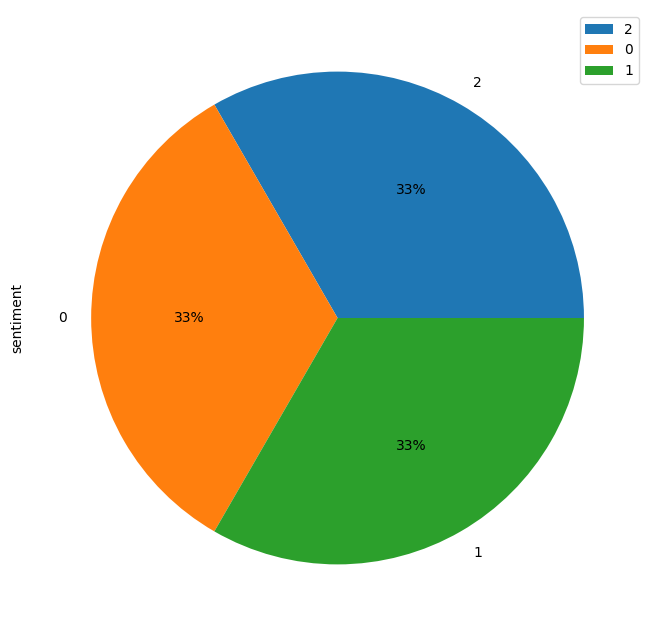

In [17]:
# proportion data
df_eda['sentiment'].value_counts().plot(kind='pie',legend=True,autopct='%1.0f%%', figsize=(15,8))
plt.show()

Here after we perform undersampling the proportion of each sentiments are equal

## 2.2 Review Trend Over The Years

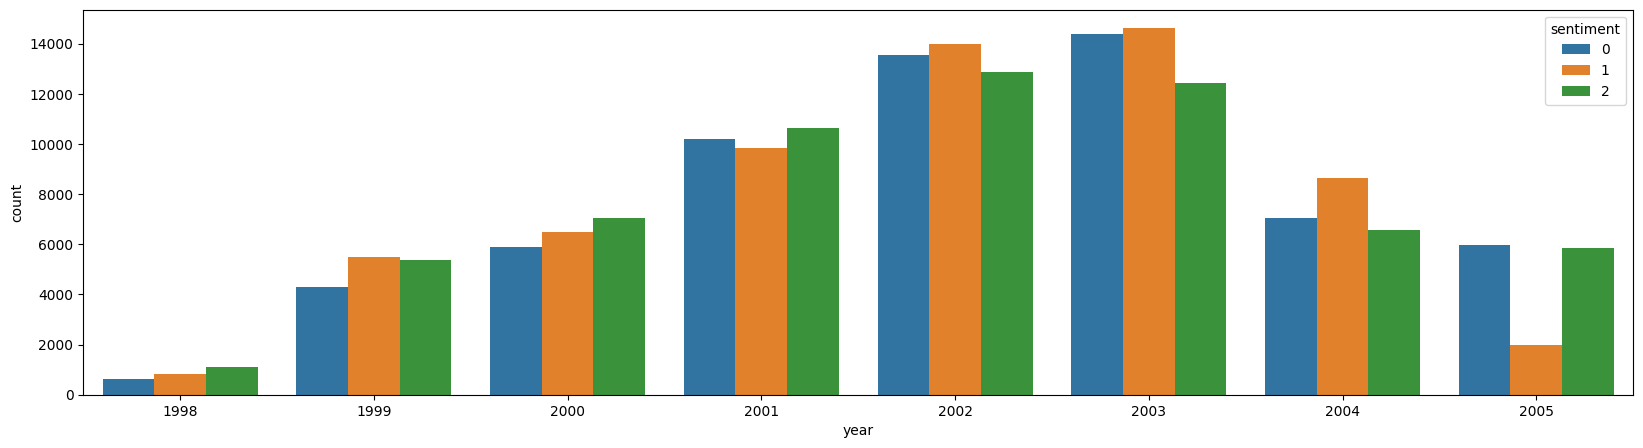

In [18]:
# Create a new column "year" from "date" column
fig, ax = plt.subplots(figsize=(20,5))
df_eda['year'] = df_eda['date'].dt.year

# Create the countplot
sns.countplot(x='year', hue='sentiment', data=df_eda)
plt.show()

The given data represents the total number of IMDb movie reviews for each year from 1998 to 2005. The number of reviews increased over the years, starting with 2549 in 1998 and steadily increasing to a peak of 41444 in 2003. However, after 2003, there was a sharp decline in the number of reviews, dropping to 22245 in 2004 and then to 13801 in 2005. This trend may be attributed to several factors such as changes in IMDb's review policies, shifts in user behavior, or the rise of alternative review platforms. It is important to note that the given data only represents the total number of reviews and does not provide any insights into the quality or content of the reviews themselves.

## 2.3 - Rating Distribution

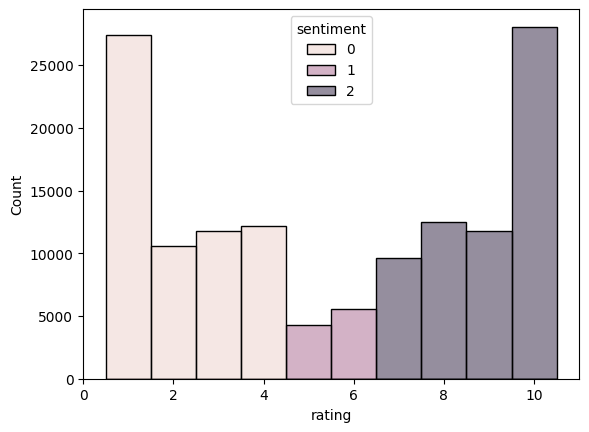

In [19]:
# Create the histplot
sns.histplot(x='rating', hue='sentiment', data=df_eda, discrete=True)
plt.show()

The distribution of ratings appears to be skewed towards the higher end, with a mean rating of 5.54 out of 10. This could potentially be a result of the undersampling technique that was implemented earlier to address the issue of class imbalance. By undersampling, we aimed to balance the number of reviews in each sentiment category, which may have resulted in a higher proportion of positive reviews in the dataset. This, in turn, could have influenced the overall rating distribution, causing it to be skewed towards the higher end. Nonetheless, further analysis is needed to confirm this hypothesis.

Mean on rating: 5.542861629811323


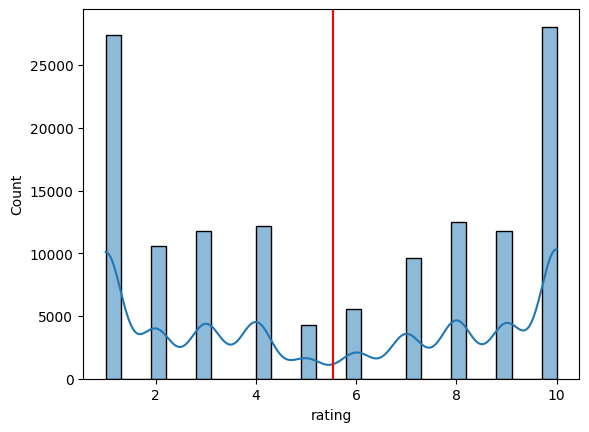

In [20]:
sns.histplot(data=df_eda, x='rating', bins=30,kde=True) 
plt.axvline(np.mean(df['rating']),color='red') 
print('Mean on rating:', np.mean(df['rating']))

The average rating of the dataset being referred to is 5.54. The mean is a statistical measure that represents the central tendency of a set of numerical data, and in this case, it represents the average rating given by the reviewers in the dataset. The mean rating can range from 1 to 10, where a rating of 1 means the movie was terrible, and a rating of 10 means the movie was excellent. Therefore, a mean rating of 5.54 indicates that, on average, the movies in the dataset received ratings that are slightly above average, indicating that the reviewers have generally enjoyed the movies they have reviewed.

## 2.4 - Top 10 Most Reviewed Movie

In [21]:
df_eda['movie'].value_counts()[:10]

The Blair Witch Project (1999)         1368
The Matrix Reloaded (2003)             1066
Signs (2002)                            805
The Matrix Revolutions (2003)           796
War of the Worlds (2005)                775
Moulin Rouge! (2001)                    766
A.I. Artificial Intelligence (2001)     761
Pearl Harbor (2001)                     739
Gladiator (2000)                        635
Battlefield Earth (2000)                581
Name: movie, dtype: int64

The years of the movies range from 1999 to 2005, with 2001, 2003, and 2000 having the highest representation of movies in the top 10.

In terms of trends, we can see that the movies with the highest number of reviews are from the early 2000s, with the peak being in 2003. This could be attributed to the increasing popularity of the internet and online movie reviews during that time, as well as the release of several highly-anticipated movies such as "The Matrix Reloaded" and "The Matrix Revolutions."

Furthermore, it is interesting to note that some of the movies in the top 10, such as "The Blair Witch Project" and "Battlefield Earth," received mixed or negative reviews from critics. However, they still managed to garner a significant number of reviews on IMDb, indicating their popularity among audiences.


## 2.5 - Words Distribution

Average words in review: 186.4326652346421


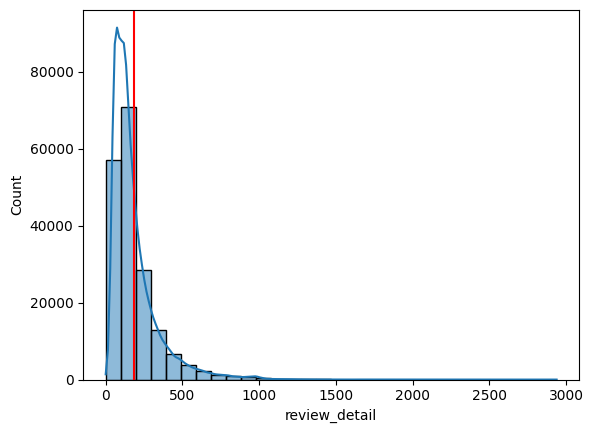

In [22]:
num_word_review = df_eda['review_detail'].apply(lambda x: len(x.split(' ')))
sns.histplot(num_word_review, bins=30,kde=True)
plt.axvline(np.mean(num_word_review),color='red')
print('Average words in review:',np.mean(num_word_review))

Across all the reviews analyzed, the average length of the reviews in terms of words is 186.43 words. This metric is an indicator of the level of detail and complexity of the reviews, as longer reviews might indicate more thoughtful and thorough opinions.

This metric is important because it can provide insights into the nature of the reviews analyzed. For example, if the average number of words is very low, it might indicate that the reviews are not very informative or detailed, which can make it difficult to extract meaningful insights. On the other hand, if the average number of words is very high, it might indicate that the reviewers are very engaged and passionate about the movies they are reviewing.

Furthermore, this metric can also be useful in understanding how to optimize the review process. For example, if the average number of words is very high, it might indicate that the review process is too time-consuming and could benefit from streamlining. Conversely, if the average number of words is very low, it might indicate that the review process needs to be more comprehensive in order to extract more valuable insights.

Average words in positive review: 180.41970702714926
Average words in neutral review: 196.71001502010756
Average words in negative review: 182.1682736566694


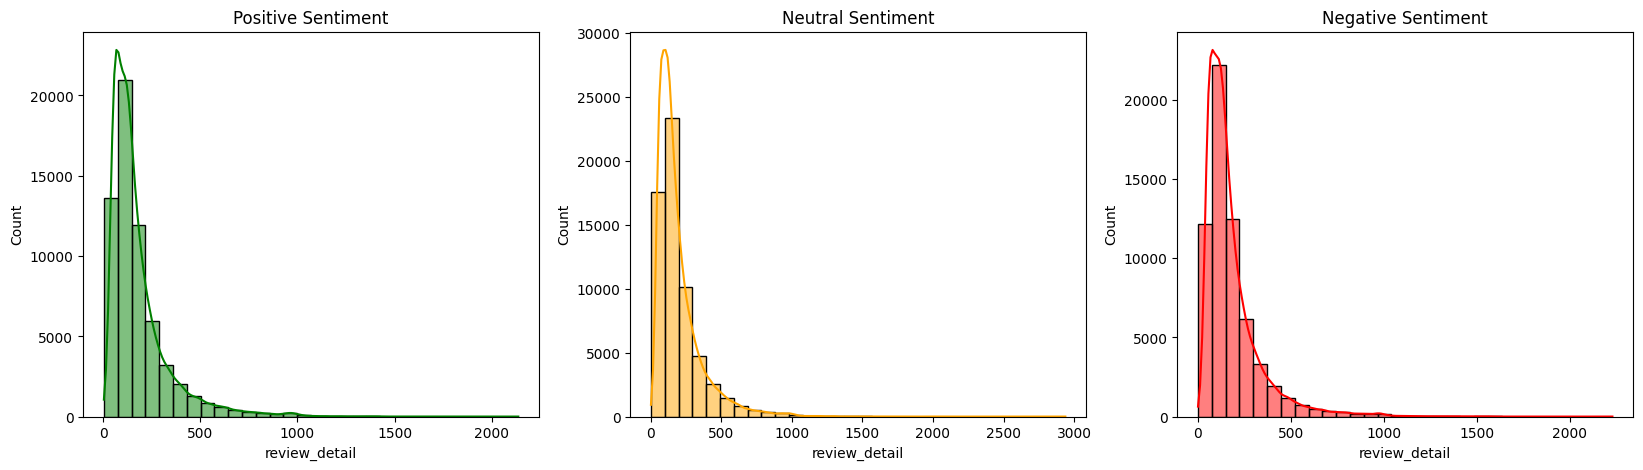

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(num_word_review[df_eda.sentiment == 2],color='green',kde=True, bins=30)
plt.title('Positive Sentiment')
print('Average words in positive review:',np.mean(num_word_review[df_eda.sentiment == 2]))

plt.subplot(1,3,2)
sns.histplot(num_word_review[df_eda.sentiment == 1],color='orange',kde=True, bins=30)
plt.title('Neutral Sentiment')
print('Average words in neutral review:',np.mean(num_word_review[df_eda.sentiment == 1]))

plt.subplot(1,3,3)
sns.histplot(num_word_review[df_eda.sentiment == 0],color='red',kde=True, bins=30)
plt.title('Negative Sentiment')
print('Average words in negative review:',np.mean(num_word_review[df_eda.sentiment == 0]))
plt.show()

This data shows the average number of words in reviews for each sentiment category: positive, neutral, and negative. Based on the data, the average number of words in a neutral review is the highest with 196.71 words, followed by positive reviews with 180.42 words, and negative reviews with 182.17 words.

This information can provide insights into how people express their opinions in online reviews. It suggests that people tend to write longer reviews when they have mixed feelings about a product or service (neutral reviews). On the other hand, people may be more concise when expressing their opinions if they have a clear positive or negative sentiment.

These insights may be helpful for businesses and organizations looking to analyze and improve customer feedback. They can use this information to identify trends in the length of reviews and adjust their strategies accordingly to better engage with customers and address their concerns.

## 2.6 - Positive Sentiment

In [24]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=80, figure_size=(25.0,10.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 9,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()

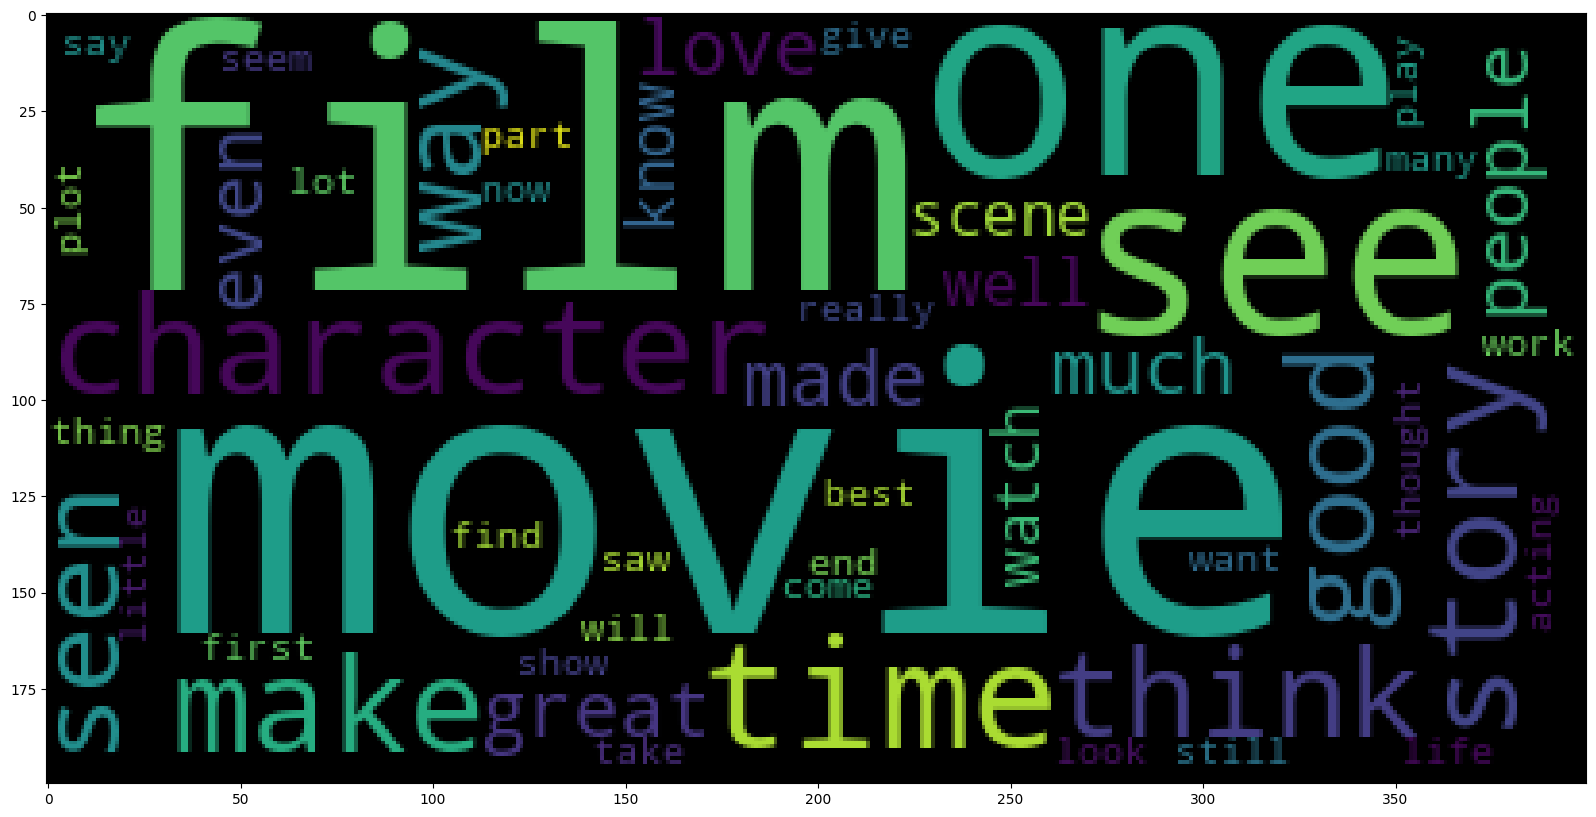

In [25]:
plt.figure(figsize=(25,10))

df_positive = df_eda[df_eda['sentiment'] == 2]

corpus=' '.join(df_positive['review_detail'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

In [26]:
# top 10 words on positive sentiment
tk = Tokenizer(num_words=100000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=' ')
tk.fit_on_texts(df_positive['review_detail'])

print('10 most popular words on the positive sentiment are: ', collections.Counter(tk.word_counts).most_common(10))

10 most popular words on the positive sentiment are:  [('the', 661801), ('and', 333162), ('a', 308235), ('of', 289748), ('to', 246566), ('is', 225318), ('in', 178796), ('it', 170403), ('i', 167444), ('this', 154522)]


## 2.7 - Neutral Sentiment

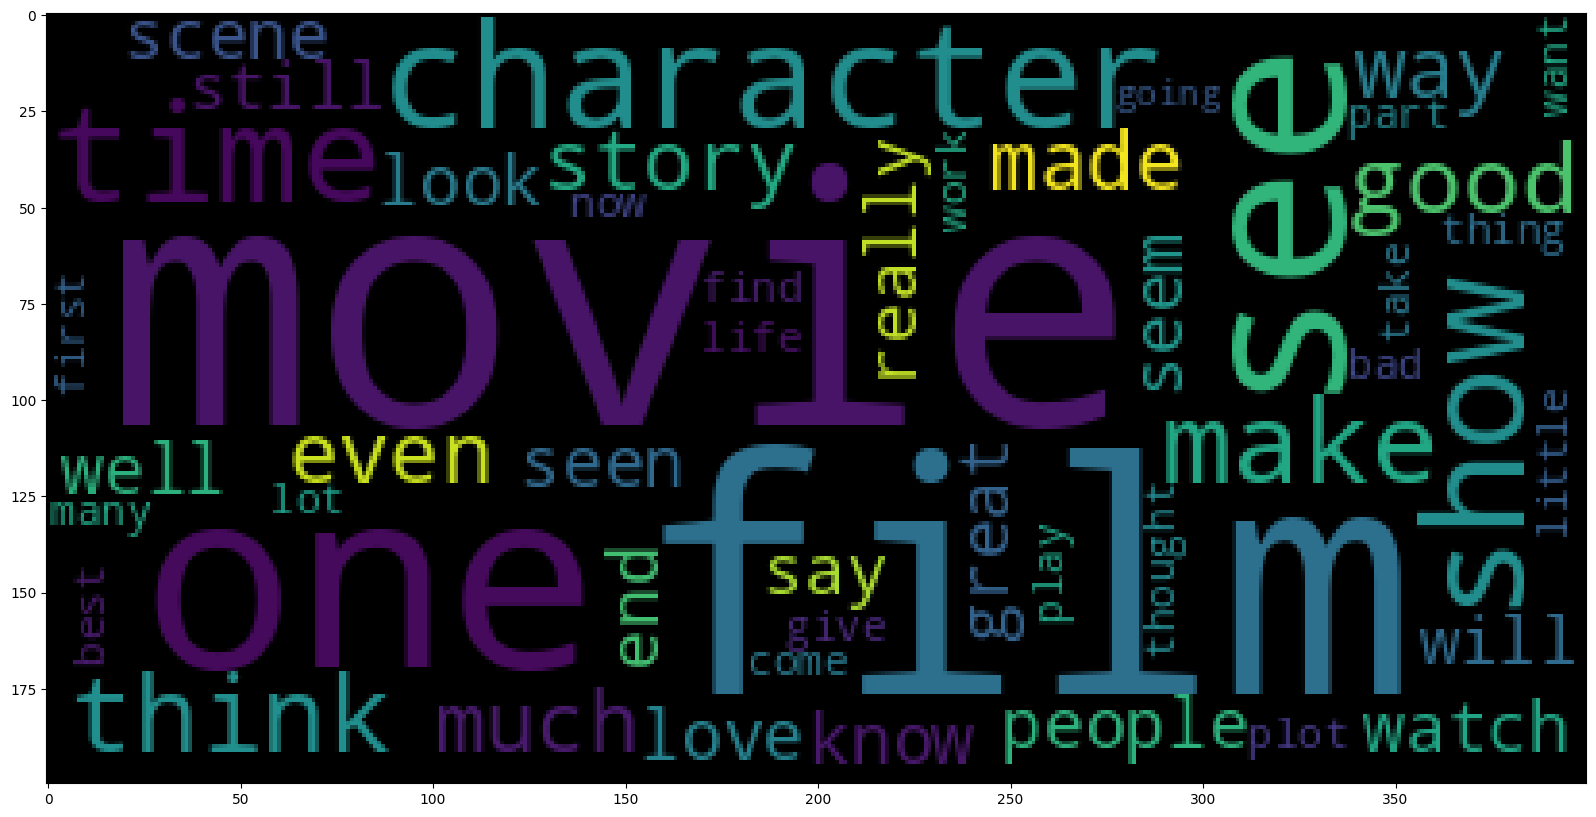

In [27]:
plt.figure(figsize=(25,10))

df_neutral = df_eda[df_eda['sentiment'] == 1]

corpus=' '.join(df_neutral['review_detail'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

In [28]:
# top 10 words on neutral sentiment
tk = Tokenizer(num_words=100000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=' ')
tk.fit_on_texts(df_neutral['review_detail'])

print('10 most popular words on the positive sentiment are: ', collections.Counter(tk.word_counts).most_common(10))

10 most popular words on the positive sentiment are:  [('the', 719889), ('and', 343463), ('a', 333794), ('of', 303857), ('to', 276420), ('is', 221507), ('in', 192381), ('i', 178819), ('it', 178362), ('this', 153707)]


## 2.8 - Negative Sentiment

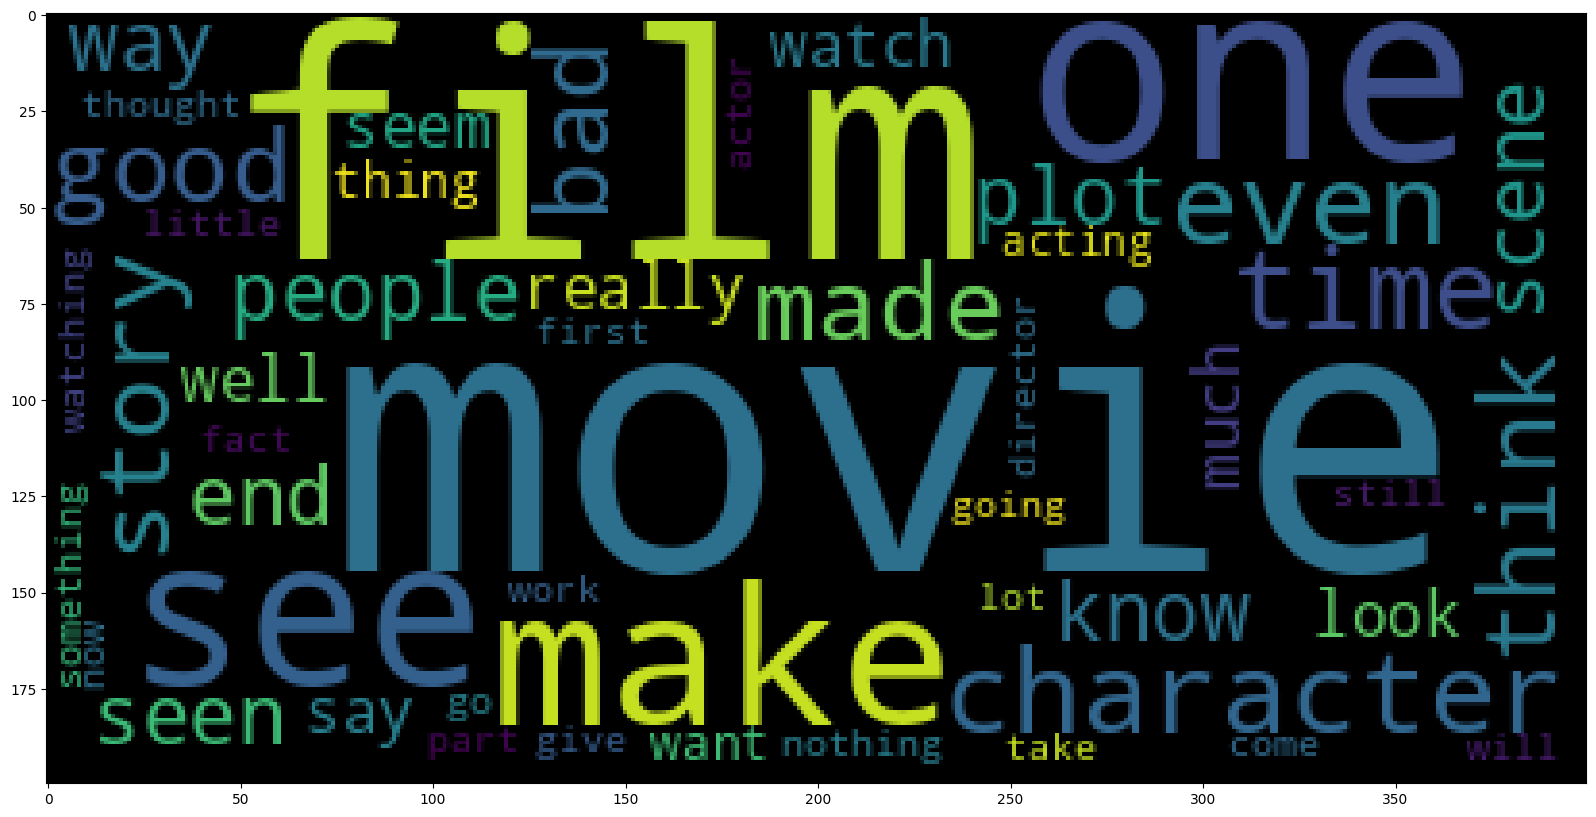

In [29]:
plt.figure(figsize=(25,10))

df_negative = df_eda[df_eda['sentiment'] == 0]

corpus=' '.join(df_negative['review_detail'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

In [30]:
# top 10 words on negative sentiment
tk = Tokenizer(num_words=100000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=' ')
tk.fit_on_texts(df_negative['review_detail'])

print('10 most popular words on the positive sentiment are: ', collections.Counter(tk.word_counts).most_common(10))

10 most popular words on the positive sentiment are:  [('the', 647107), ('a', 303032), ('and', 285602), ('of', 270719), ('to', 268334), ('is', 192765), ('i', 183779), ('this', 176830), ('it', 167355), ('in', 167134)]


Stopwords are commonly used words that are often removed from text during data preprocessing, as they are unlikely to provide useful information for sentiment analysis or other natural language processing tasks. However, if the 10 most popular words in the sentiment dataset are still stopwords, it may suggest that the text data is highly dependent on common and uninformative language, rather than more specific and meaningful vocabulary. This can make it more difficult to accurately classify and analyze the sentiment of the text, as important keywords or phrases may be masked by the abundance of common words. It may be necessary to perform further analysis or feature engineering to better capture the sentiment of the text beyond the most frequent words.

# 3 - Data Preprocessing

## 3.1 - Duplicated Data

In [31]:
df['helpful'] = df['helpful'].apply(tuple)

In [32]:
df.duplicated().sum()/len(df)*100

0.0

## 3.2 - Missing Value Handling

In [33]:
df.isnull().sum()/len(df)*100

index              0.000000
review_id          0.000000
reviewer           0.000000
movie              0.000000
rating            28.010616
review_summary     0.000000
spoiler_tag        0.000000
review_detail      0.000000
helpful            0.000000
sentiment          0.000000
date               0.000000
dtype: float64

In [34]:
df['rating'].fillna(df['rating'].median(), inplace=True)

In [35]:
df.head()

,index,review_id,reviewer,movie,rating,review_summary,spoiler_tag,review_detail,helpful,sentiment,date
0,116376,rw0194843,viper2104,The Last Unicorn (1982),10.0,Probably the best movie I have ever seen,0,When I was young this movie meant the world to...,"(0, 3)",2,2002-05-13
1,430472,rw0805617,choclit_cherrikisses,Love Liza (2002),8.0,Phillip Seymour Hoffman enthralled me!,0,"Though the movie seemed to lack something, Phi...","(2, 2)",2,2003-09-27
2,163377,rw0248746,petrigato,Predator (1987),10.0,My favourite action movie!,0,I´ve seen this movie about 1000 times and I ne...,"(1, 3)",2,2000-09-03
3,67787,rw0138824,jessewillis,Thunderbolt and Lightfoot (1974),7.0,A male Thelma And Louise!,0,Thunderbolt and Lightfoot (1974) isn't perfect...,"(44, 66)",2,2003-10-16
4,486684,rw0868922,citrus71,Raising Victor Vargas (2002),10.0,What an accomplishment,0,An amazing film that captures the pulse of the...,"(3, 24)",2,2004-01-29


## 4.1 - Text Processing

One of the challenge that I assume when handling data contains informal language is the high text is fulled by the charcters or language that will not contribute to our prediction later. Hence I will try to do my best to clean the data from those contaminated factors. Before conducting the sentiment prediction model, I will process the text data in the review_detail column that can potentially improve the model's performance. Several processes include:

- Removing stop words such as 'the', 'a', 'is' that will often be found in every sentence, and these words do not reflect the sentiment.
- Removing various symbols and numbers because of the same reason that they do not reflect the sentiment of the sentence. Although numbers in reviews may play a role in sentiment, they are not frequently encountered.
- Lowercasing every word. Because the same word but with different capitalization will be detected as a different vocabulary, resulting in more vocabularies generated. This will make the data fed into the model larger, hence more costly and less helpful for the model's performance.
- Removing symbols (punctuations) such as "!", "?", "/", etc. and removing spaces ("\n"). These symbols are considered to not reflect the sentiment of the review.
- Removing HTML-formatted words such as http.. and www.., and hashtags. Because there may be several reviews that contain HTML links that are unnecessary for sentiment analysis.
- Performing stemming and lemmatization. Stemming here will reduce words into the basic form. For example, 'loved' will become 'love' after stemming. On the other hand, lemmatization is somewhat similar in making basic words, but the resulting word will still have the context from our reading perspective. For example, the word 'studies' will become 'study'. So, stemming essentially only cuts off some letters, while lemmatization does not. We will examine examples of the results of lemmatization and stemming, and we will apply one of them for the following process.
- Handling utf-8 is also important because it is a character encoding format that can handle any character in the Unicode standard. It is essential when processing text data that includes non-English characters, such as accented characters or characters used in languages other than English. By handling utf-8, we can ensure that the text data is correctly encoded and processed without any loss or distortion of characters, which can affect the performance of the sentiment analysis model.

### 4.1.1 Hashtag

In [36]:
sample_hashtag = df[df['review_detail'].str.contains('#')]
sample_hashtag = sample_hashtag['review_detail'].iloc[0]
sample_hashtag

'I just saw Swimming, yesterday, I am so surprised that I didn\'t see it in the past. I have seen nearly all Spacey and Whaley films, but for some reason I missed this one. (Kill me!). Besides being a bad speller I love "truth movies" like this one. After seeing Spacey in Glen Garry, (which I lost count the # of times), I knew we Had a new super star. One of my ways of noticing a great actor is "in the eyes" like mentioned in the commentary tracks of the film. Since purchasing the film 2 days ago, I saw it 4 times, once just the film and then with the 3 commentaries. I don\'t want to bore you all with any more chatter, but just to end with I didn\'t figure out the ending till I saw the look in Spacy\'s eyes. (the eyes again) after my first viewing I just said "phuewwwwwwwwwww, wow, wow, pH.See ya!!! H.K.R.'

as we can see, that hashtag usually use such as:
- to represent the order of something. for example when a reviewer explaining why the movie sit on certain order on a chart or when the reviewer elaborate their reasons upon the movie(reason #1, #2, #3, etc)
- to represent a hashtag

In [37]:
# substitute hashtag with empty values
review_hashtag = re.sub(r'#[A-Za-z0-9_]+', '', sample_hashtag)
review_hashtag

'I just saw Swimming, yesterday, I am so surprised that I didn\'t see it in the past. I have seen nearly all Spacey and Whaley films, but for some reason I missed this one. (Kill me!). Besides being a bad speller I love "truth movies" like this one. After seeing Spacey in Glen Garry, (which I lost count the # of times), I knew we Had a new super star. One of my ways of noticing a great actor is "in the eyes" like mentioned in the commentary tracks of the film. Since purchasing the film 2 days ago, I saw it 4 times, once just the film and then with the 3 commentaries. I don\'t want to bore you all with any more chatter, but just to end with I didn\'t figure out the ending till I saw the look in Spacy\'s eyes. (the eyes again) after my first viewing I just said "phuewwwwwwwwwww, wow, wow, pH.See ya!!! H.K.R.'

### 4.1.2 Text Contains Mention '@'

In [38]:
sample_at = df[df['review_detail'].str.contains('@')]
sample_at = sample_at['review_detail'].iloc[1]
sample_at

"The Italian Job is a good movie! A movie of betrayal, murder, and payback! Edward Norton's performance was great along with everyone else's. This is one of the best performances of Norton and the others. Highly recommended. It was a good mix of action and comedy. That's a hard quality to find in a movie. There's even a Spider-Man appearance! Again, highly recommended! If you have any comments for me, please e-mail me at tylerripen@yahoo.com."

In [39]:
# remove @
review_at = re.sub("@[A-Za-z0-9_.]+","", sample_at) 
review_at

"The Italian Job is a good movie! A movie of betrayal, murder, and payback! Edward Norton's performance was great along with everyone else's. This is one of the best performances of Norton and the others. Highly recommended. It was a good mix of action and comedy. That's a hard quality to find in a movie. There's even a Spider-Man appearance! Again, highly recommended! If you have any comments for me, please e-mail me at tylerripen"

### 4.1.3 UTF-8

In [40]:
sample_utf = df[df['review_detail'].str.contains('\\\w+')]
sample_utf = sample_utf['review_detail'].iloc[1]
sample_utf

'This is a movie where from the beginning to the end you\'re pretty much like "what the" never feeling satisfied and feeling your intelligence has been insulted.  A movie where although you don\'t care who the killer is, you know it\'s only one of 3 guys and you get rule out the most obvious one and you pretty much have a 50 50 shot.  Meg Ryan takes a different road playing a seedy, "sexy" strange mysterious woman which is a stretch from the good girl wholesome image she projects. Although not bad, she outta stick to the other image. \\we also get to see a little skin from her, or the whole enchilada as she hooks up with some sleezy dude who looks like well a sleezy dude.  I give her a 3.5 out of ten for her skin show, in fact, you were relieved when the lighting became dark in the shoot.I would skip this one, but if you should rent it you will get some relief from \\kevin bacon who makes some cameos as a crazy stalker who brings some light to the movie...almost hoping that he\'d kill 

In [41]:
# remove consecutive letter
review_utf = re.sub('\w*(\w)\1{2,}\w','\1', sample_utf) 
review_utf

'This is a movie where from the beginning to the end you\'re pretty much like "what the" never feeling satisfied and feeling your intelligence has been insulted.  A movie where although you don\'t care who the killer is, you know it\'s only one of 3 guys and you get rule out the most obvious one and you pretty much have a 50 50 shot.  Meg Ryan takes a different road playing a seedy, "sexy" strange mysterious woman which is a stretch from the good girl wholesome image she projects. Although not bad, she outta stick to the other image. \\we also get to see a little skin from her, or the whole enchilada as she hooks up with some sleezy dude who looks like well a sleezy dude.  I give her a 3.5 out of ten for her skin show, in fact, you were relieved when the lighting became dark in the shoot.I would skip this one, but if you should rent it you will get some relief from \\kevin bacon who makes some cameos as a crazy stalker who brings some light to the movie...almost hoping that he\'d kill 

### 4.1.4 Laughing Text

such as hahaha, lmao, lol, lmfao, lololol

In [42]:
sample_laugh = df[df['review_detail'].str.contains('\b[ha]*(?:ha|ha)[ha]*\b|\b[lol]*(?:lol|lol)[lol]*\b|lmfao|lmao')]
sample_laugh = sample_laugh['review_detail'].iloc[0]
sample_laugh

"This film is so bad it's funny, well actually it's pee-ya-pants roflmao stuff :DIt's a fantasy movie, swords and magic, hero on quest to defeat evil baddie, hero joins up with dwarfs, elves etc. ...it's a really really really bad rip-off of LOTR basically, but somehow the sheer badness of the film makes it strangely appealing, although I probably wouldn't want to sit through it more than twice in one lifetime."

In [43]:
# remove laughing text
review_laugh = re.sub('\b[ha]*(?:ha|ha)[ha]*\b|\b[lol]*(?:lol|lol)[lol]*\b|lmfao|lmao','', sample_laugh) 
review_laugh

"This film is so bad it's funny, well actually it's pee-ya-pants rof stuff :DIt's a fantasy movie, swords and magic, hero on quest to defeat evil baddie, hero joins up with dwarfs, elves etc. ...it's a really really really bad rip-off of LOTR basically, but somehow the sheer badness of the film makes it strangely appealing, although I probably wouldn't want to sit through it more than twice in one lifetime."

### 4.1.5 Character Escape

In [44]:
sample_char = df[df['review_detail'].str.contains('\\n')]
sample_char = sample_char['review_detail'].iloc[0]
sample_char

"Thunderbolt and Lightfoot (1974) isn't perfect, but it has a lot going for it. The pairing Eastwood and Bridges is great, these aren't the same kinds of actors, and yet their on-screen relationship works well. Supporting character actors George Kennedy and Geoffrey Lewis round out rest of the heisters, and Gary Busey makes an early appearance in a small role.  Also of note is the striking Montana scenery, quite unseen on film, this movie does an admirable job showcasing it. What I'm really surprised about is how no one else seems to have noticed a couple of things about this film.\nFirst: The title of this film, and its two main characters are an homage to a pair of famous 19th century highwaymen who called themselves respectively `Captain Thunderbolt' and `Captain Lightfoot'. This isn't the last time Hollywood film criminals would be named after real life bandits. In the film `The Way Of The Gun' the characters are called `Mr. Parker and Mr. Longbaugh' which of course were the real n

In [45]:
# remove charchter escape
review_char = re.sub('\\n','', sample_char) 
review_char

"Thunderbolt and Lightfoot (1974) isn't perfect, but it has a lot going for it. The pairing Eastwood and Bridges is great, these aren't the same kinds of actors, and yet their on-screen relationship works well. Supporting character actors George Kennedy and Geoffrey Lewis round out rest of the heisters, and Gary Busey makes an early appearance in a small role.  Also of note is the striking Montana scenery, quite unseen on film, this movie does an admirable job showcasing it. What I'm really surprised about is how no one else seems to have noticed a couple of things about this film.First: The title of this film, and its two main characters are an homage to a pair of famous 19th century highwaymen who called themselves respectively `Captain Thunderbolt' and `Captain Lightfoot'. This isn't the last time Hollywood film criminals would be named after real life bandits. In the film `The Way Of The Gun' the characters are called `Mr. Parker and Mr. Longbaugh' which of course were the real nam

### 4.1.6 Punctiation

`!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

In [46]:
sample_punc = df[df['review_detail'].str.contains('['+string.punctuation+']', regex=True)]
sample_punc = sample_punc['review_detail'].iloc[0]
sample_punc

'When I was young this movie meant the world to me. I would rent it out constantly and watch it again and again and again. The soundtrack is great and the creators did not ruin it by bouncing characters into song every 2 seconds like a certain American based company. It has a really unique storyline and an ending that is both not entirely expected but combined with the music score is almost enough to bring one to tears (of joy and partial sadness, its hard to say which). Even now many many years later I download a song from the movie and its enough to make me ultra nostalgic about it and want to see it again (which I will many many times) Truly a classic, I recommend it to everyone.'

In [47]:
# remove punctuation
review_punc = sample_punc.translate(str.maketrans("","",string.punctuation))
review_punc

'When I was young this movie meant the world to me I would rent it out constantly and watch it again and again and again The soundtrack is great and the creators did not ruin it by bouncing characters into song every 2 seconds like a certain American based company It has a really unique storyline and an ending that is both not entirely expected but combined with the music score is almost enough to bring one to tears of joy and partial sadness its hard to say which Even now many many years later I download a song from the movie and its enough to make me ultra nostalgic about it and want to see it again which I will many many times Truly a classic I recommend it to everyone'

### 4.1.7 Website Link

In [48]:
sample_link = df[df['review_detail'].str.contains('www.\S+|http\S+')]
sample_link = sample_link['review_detail'].iloc[0]
sample_link

'I just saw Swimming, yesterday, I am so surprised that I didn\'t see it in the past. I have seen nearly all Spacey and Whaley films, but for some reason I missed this one. (Kill me!). Besides being a bad speller I love "truth movies" like this one. After seeing Spacey in Glen Garry, (which I lost count the # of times), I knew we Had a new super star. One of my ways of noticing a great actor is "in the eyes" like mentioned in the commentary tracks of the film. Since purchasing the film 2 days ago, I saw it 4 times, once just the film and then with the 3 commentaries. I don\'t want to bore you all with any more chatter, but just to end with I didn\'t figure out the ending till I saw the look in Spacy\'s eyes. (the eyes again) after my first viewing I just said "phuewwwwwwwwwww, wow, wow, pH.See ya!!! H.K.R.'

In [49]:
# remove website link
review_link = re.sub('www.\S+|http\S+','', sample_link)
review_link

'I just saw Swimming, yesterday, I am so surprised that I didn\'t see it in the past. I have seen nearly all Spacey and Whaley films, but for some reason I missed this one. (Kill me!). Besides being a bad speller I love "truth movies" like this one. After seeing Spacey in Glen Garry, (which I lost count the # of times), I knew we Had a new super star. One of my ways of noticing a great actor is "in the eyes" like mentioned in the commentary tracks of the film. Since purchasing the film 2 days ago, I saw it 4 times, once just the film and then with the 3 commentaries. I don\'t want to bore you all with any more chatter, but just to end with I didn\'t figure out the ending till I saw the look in Spacy\'s eyes. (the eyes again) after my first viewing I just said "phue wow, wow, pH.See ya!!! H.K.R.'

In [50]:
def text_process(text):
    additional_stopwords = ['film', 'movie', 'actor', 'actress', 'director', 'plot', 'character', 'review', 'rating', 'storyline', 'story', 'series', 'time', 'since', 'film', 'people', 'scene']
    stpwds_eng = list(set(stopwords.words('english')))
    for i in additional_stopwords:
        stpwds_eng.append(i)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    text = re.sub("@[A-Za-z0-9_.]+","", text) 
    text = re.sub('\w*(\w)\1{2,}\w','\1', text)
    text = re.sub('\b[ha]*(?:ha|ha)[ha]*\b|\b[lol]*(?:lol|lol)[lol]*\b|lmfao|lmao','', text)
    text = re.sub('\\n','', text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = text.strip() 
    text = re.sub('www.\S+|http\S+','', text)
    tokens = word_tokenize(text) # detect token
    text = ' '.join([word for word in tokens if word not in stpwds_eng])
    return text

### 4.1.8 Model 1

In [51]:
# convert text into lowercase
text = df['review_detail'][42]
text_lower = text.lower()
text_lower

'a black, take no prisoners, satire of a culture that uses euphemisms in place of expletive labels - if retarded can be described as "special" then i suppose "n_____" becomes "a_____ a_____" (sic) and so forth. the cast must have wanted to lynch the obsessive compulsive directors, but the editors, much to their credit, ran with it to produce a 10/10. will anyone in this receive any oscar attention?  if not, where do we (the audience) go from here?'

In [52]:
txt_clean = text_process(text_lower)
txt_clean

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes sic forth cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 anyone receive oscar attention audience go'

In [53]:
# stemming using PorterStemmer
pstemmer = PorterStemmer()

teks_stemm   = pstemmer.stem(txt_clean)
teks_stemm

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes sic forth cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 anyone receive oscar attention audience go'

In [54]:
# try using Porterstemmer on the most popular word
pstemmer.stem('movie')

'movi'

as we can see here, stemming using portstemmer somehow tweak the real meaning of the word such as `movie` to `movi` which is two different words. let's try another words

In [55]:
print(pstemmer.stem("amazing movie"))
print(pstemmer.stem("amazing"))

amazing movi
amaz


it seems that posterstemmer is not performing well to both words. for the first word it dismissed the meaning of movie even it succeeded to mantain the word amazing as the noun we use to describe the movie. and for the second word it also dismissed the meaning of amazing

In [56]:
lemmatizer = WordNetLemmatizer()

teks_lem = lemmatizer.lemmatize(txt_clean)
teks_lem

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes sic forth cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 anyone receive oscar attention audience go'

In [57]:
print(lemmatizer.lemmatize("making"))
print(lemmatizer.lemmatize("hooked"))

making
hooked


The lemmatizer result is not good because the words cannot be changed into their base form. I will try adding a part of speech (pos) parameter "v" or "verbs". I choose verbs because after the tokenization process, the words in the tweet stand alone/individual, so the words with affixes tend to be recognized as verbs instead of adjectives ("a") and adverbs ("r"). However, if the word is indeed combined with other words, it is correct that the base form is verbs/adjectives/adverbs. So the process of adding the pos parameter is only to minimize errors.

In [58]:
print(lemmatizer.lemmatize("making", pos="v"))
print(lemmatizer.lemmatize("hooked", pos="v"))

make
hook


after adding param pos, the result is better

### 4.1.9 Model 2

In [59]:
# stemming
lstemmer = LancasterStemmer()

teks_stemm   = lstemmer.stem(txt_clean)
teks_stemm

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes sic forth cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 anyone receive oscar attention audience go'

In [60]:
teks_lem = lemmatizer.lemmatize(teks_stemm, pos="v")
teks_lem

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes sic forth cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 anyone receive oscar attention audience go'

In [61]:
lemmatizer.lemmatize("amazing", pos="v")

'amaze'

Stemming and lemmatization are techniques used in natural language processing to reduce words to their base form. LancasterStemmer and PorterStemmer are two popular stemming algorithms used in NLP. The difference between stemming and lemmatization is that stemming simply removes the suffix from the word, while lemmatization considers the context and converts the word to its base form.

In this case, the comparison was made between LancasterStemmer and PorterStemmer in terms of their effectiveness in reducing words to their base form. It was found that LancasterStemmer with lemmatization using the parameter pos, which considers the part of speech of the word, was more effective than PorterStemmer with basic lemmatization. This means that the LancasterStemmer algorithm produced more accurate base forms of the words than the PorterStemmer algorithm.

## 4.5 Define Function

In [117]:
def text_process(text):
    additional_stopwords = ['film', 'movie', 'actor', 'actress', 'director', 'plot', 'character', 'review', 'rating', 'storyline', 'story', 'series', 'time', 'since', 'film', 'people', 'scene']
    stpwds_eng = list(set(stopwords.words('english')))
    for i in additional_stopwords:
        stpwds_eng.append(i)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    text = re.sub("@[A-Za-z0-9_.]+","", text) 
    text = re.sub('\w*(\w)\1{2,}\w','\1', text)
    text = re.sub('\b[ha]*(?:ha|ha)[ha]*\b|\b[lol]*(?:lol|lol)[lol]*\b|lmfao|lmao','', text)
    text = re.sub('\\n','', text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = text.strip()
    text = re.sub(r'\b(I|we|they|she|he)\b', '', text) # replace pronouns with empty string 
    text = re.sub('www.\S+|http\S+','', text)
    tokens = word_tokenize(text) # detect token
    text = ' '.join([word for word in tokens if word not in stpwds_eng])
    text = lstemmer.stem(text)  # stemming
    text = lemmatizer.lemmatize(text, pos="v")  # lemmatizing
    return text

In [118]:
temp = text_process(teks_lem)
temp

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes sic forth cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 anyone receive oscar attention audience go'

In [119]:
df_new = df.copy()
df_new['review_detail'] = df_new['review_detail'].apply(lambda x: text_process(x))

In [120]:
print('Before Cleansing: ', df['review_detail'][42])
print('After cleansing: ',df_new['review_detail'][42])

Before Cleansing:  a black, take no prisoners, satire of a culture that uses euphemisms in place of expletive labels - if retarded can be described as "special" then I suppose "N_____" becomes "A_____ A_____" (sic) and so forth. The cast must have wanted to lynch the obsessive compulsive directors, but the editors, much to their credit, ran with it to produce a 10/10. Will anyone in this receive any Oscar attention?  If not, where do we (the audience) go from here?
After cleansing:  black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes a a sic forth the cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 will anyone receive oscar attention if audience go


## 4.6 - EDA After Cleaning

In [121]:
# top 10 words on positive sentiment
tk = Tokenizer()
tk.fit_on_texts(df_new['review_detail'])

print('10 most popular words on the positive sentiment are: ', collections.Counter(tk.word_counts).most_common(10))

10 most popular words on the positive sentiment are:  [('the', 245823), ('one', 157871), ('like', 121303), ('good', 99892), ('this', 89908), ('see', 82813), ('it', 75495), ('would', 74708), ('really', 71476), ('even', 69302)]


### 4.6.1 - Positive Sentiment

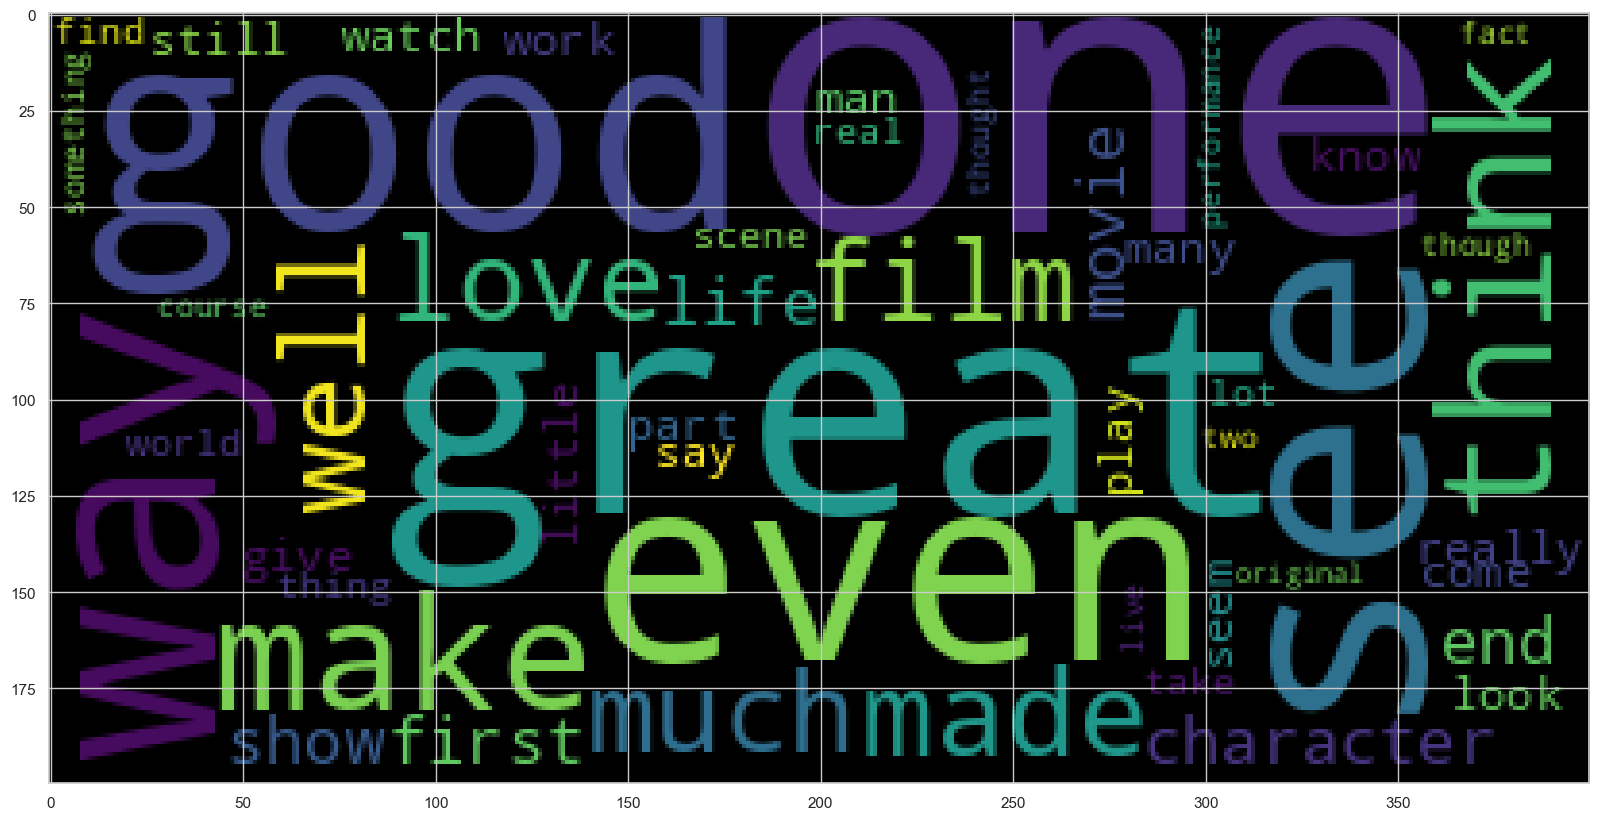

In [122]:
plt.figure(figsize=(25,10))

df_positive = df_new[df_new['sentiment'] == 2]

corpus=' '.join(df_positive['review_detail'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

The statement is referring to the top 10 words that frequently appear in the reviews with a positive sentiment. The numbers in parentheses indicate the frequency of occurrence of each word in the dataset.

From the list, it can be observed that the most common words used in positive reviews are "one", "good", "great", "see", "will", "make", "well", "really", "best", and "first". These words are often used to express positive opinions, such as "good movie", "great acting", "will definitely watch again", "best film ever", etc.

It is important to note that these words may not necessarily indicate a positive sentiment on their own. For instance, the word "one" is a common pronoun that may not inherently have a positive or negative connotation. However, when used in conjunction with other words, it may help express a positive sentiment.

Analyzing the most popular words in positive reviews can help identify patterns and themes that are commonly associated with positive sentiments. This information can be useful for improving sentiment analysis models, identifying common trends in customer feedback, and developing marketing strategies to appeal to positive customer sentiments.

### 4.6.3 - Neutral Sentiment

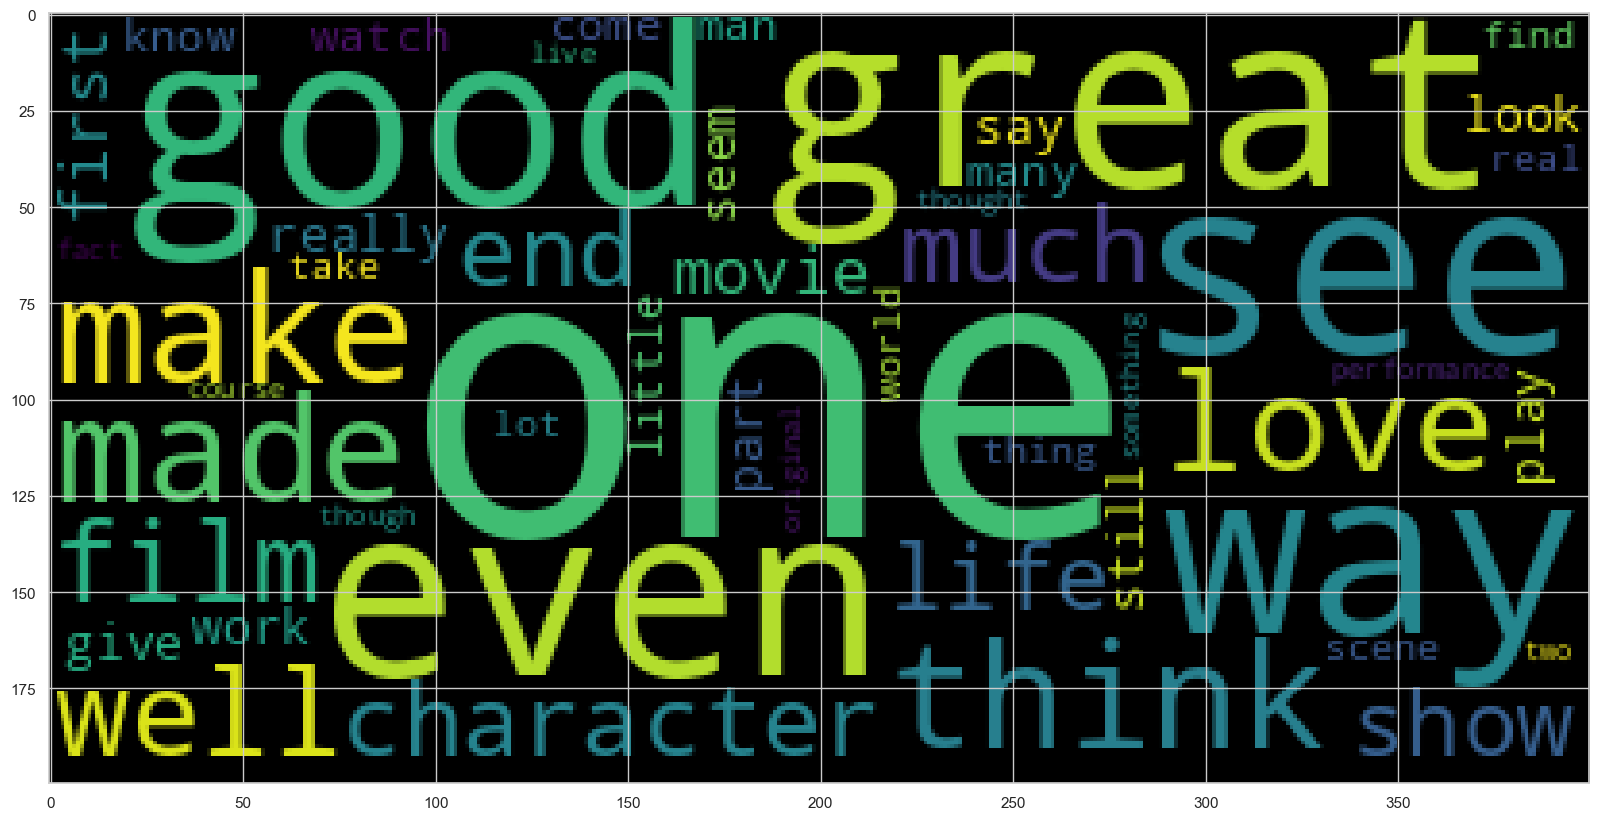

In [123]:
plt.figure(figsize=(25,10))

df_neutral = df_new[df_new['sentiment'] == 1]

corpus=' '.join(df_positive['review_detail'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

The most frequent word in the neutral sentiment category is 'one' , followed by 'see'. Other common words in this category include 'good', 'show', 'really', 'make', 'great', 'even', 'much', and 'well'. These words are typically neutral in tone and are commonly used in everyday language to express opinions, describe experiences, or provide information.

### 4.6.1 - Negative Sentiment

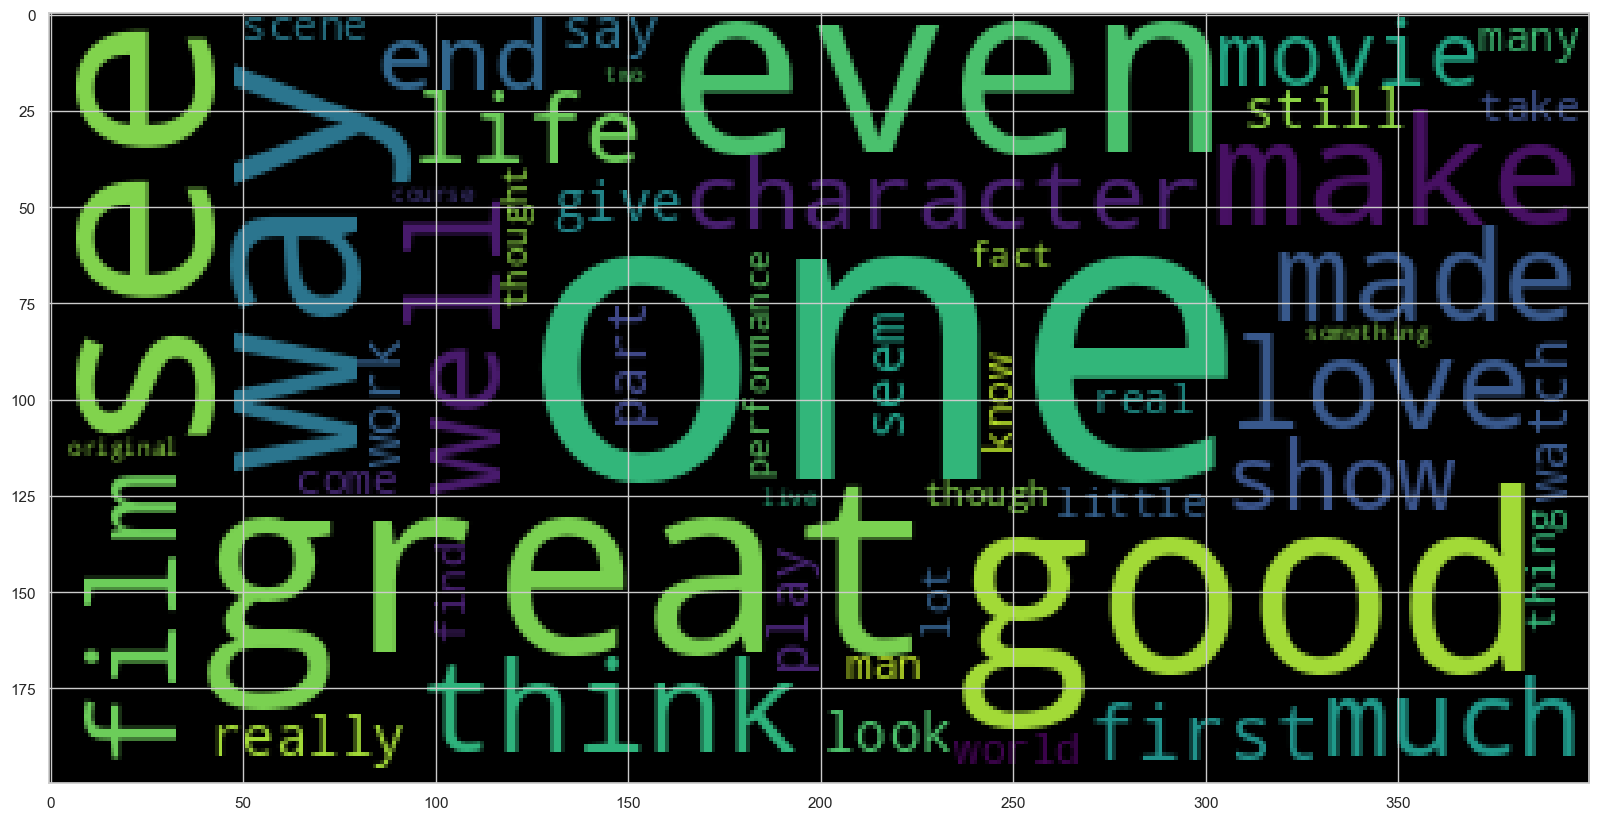

In [124]:
plt.figure(figsize=(25,10))

df_negative = df_new[df_new['sentiment'] == 0]

corpus=' '.join(df_positive['review_detail'])
word_cloud = WordCloud(max_words=50).generate(corpus)
img=word_cloud.to_image()
plt.imshow(img)

It is important to note that the appearance of these words in a negative review may not necessarily indicate a negative sentiment towards the movie. For example, the word "one" may be used to refer to a single item or entity in the review, while "good" may be used in a sarcastic context to indicate that the movie was actually bad. Similarly, words like "great" and "well" may be used positively in certain contexts, but may also be used negatively to indicate a lack of enthusiasm or interest.

Therefore, while these words are commonly used in reviews with a negative sentiment, it is important to consider their context and the overall tone of the review before making any conclusions about the reviewer's sentiment towards the movie.

## 4.6 - Splitting X and y

In [125]:
X = df_new['review_detail']
y = df_new['sentiment']

In [126]:
# Split between Train-Set, Val-Set, and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.02, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (371,)
Val Size :  (3344,)
Test Size :  (182036,)


## 4.7 - Word Vectorization

In [127]:
# apply vectorization
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<371x10091 sparse matrix of type '<class 'numpy.int64'>'
	with 32270 stored elements in Compressed Sparse Row format>

In [128]:
# Get vocab and max len 
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Total Vocab : ", total_vocab)
print("Maximum words in a review : ", max_sen_len, "words")

Total Vocab :  10091
Maximum words in a review :  576 words


In [129]:
# apply vector 
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # using sequential API
                                       )

text_vectorization.adapt(X_train) 

In [130]:
df_new['review_detail'][42]

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes a a sic forth the cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 will anyone receive oscar attention if audience go'

In [131]:
text_vectorization([df_new['review_detail'][42]])

<tf.Tensor: shape=(1, 576), dtype=int64, numpy=
array([[ 209,  105,    1, 5624, 1497, 1308,    1,  174,    1,    1, 1664,
        1235,   81,  945, 1167,  443,   57,   57,    1, 2443,    2,   99,
         103,  262, 2313,    1,    1,  436,    1,   14, 1501, 3140, 3171,
        1560,  818,  160,    1,  681,  479,   49,  122,   46,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

## 4.8 - Word Embedding

In [132]:
embedding = Embedding(input_dim=total_vocab,
                      output_dim=100,     # due to large dataset i'll try 100
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [133]:
df_new['review_detail'][42]

'black take prisoners satire culture uses euphemisms place expletive labels retarded described special suppose n becomes a a sic forth the cast must wanted lynch obsessive compulsive directors editors much credit ran produce 1010 will anyone receive oscar attention if audience go'

In [134]:
# check embedded word
emb_res = embedding(text_vectorization([df_new['review_detail'][42]]))
emb_res

<tf.Tensor: shape=(1, 576, 100), dtype=float32, numpy=
array([[[-0.01096467, -0.02961504,  0.02110174, ...,  0.03547987,
         -0.02302822,  0.03845214],
        [ 0.04341869, -0.03956609,  0.00830413, ..., -0.00380397,
         -0.01286487,  0.03867668],
        [-0.0309772 , -0.02606517, -0.03196807, ...,  0.00320464,
          0.01144733, -0.02270647],
        ...,
        [ 0.02681956, -0.04306909, -0.00087087, ...,  0.02551987,
          0.04001143,  0.02460421],
        [ 0.02681956, -0.04306909, -0.00087087, ...,  0.02551987,
          0.04001143,  0.02460421],
        [ 0.02681956, -0.04306909, -0.00087087, ...,  0.02551987,
          0.04001143,  0.02460421]]], dtype=float32)>

# 5 - Feature Engineering

In [135]:
# OneHotEncoding on sentiment
y_train_ohe = to_categorical(y_train, num_classes=3)
y_val_ohe = to_categorical(y_val, num_classes=3)
y_test_ohe = to_categorical(y_test, num_classes=3)

## 5.1 - Pipeline TF

In [136]:
# pipeline tensorflow
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(10000).batch(20)
data_val = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).shuffle(10000).batch(20)
data_test = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).shuffle(10000).batch(20)

# 6 - Model Definition

In [137]:
print('X_train shape : ',X_train.shape)
print('X_val shape : ', X_val.shape)
print('X_test shape : ', X_test.shape)

X_train shape :  (371,)
X_val shape :  (3344,)
X_test shape :  (182036,)


## 6.1 - LSTM: Sequential API

### 6.1.1 - Model Sequential: Definition

The LSTM baseline model I build is a Sequential model that utilizes text vectorization and word embedding to process the input text data. The model consists of four layers:

- The first layer is the text vectorization layer which will transform the text data into a numerical representation. This layer converts the text data into a dense vector of fixed size by applying a vocabulary of size max_words to the input data.

- The second layer is the word embedding layer which maps the input numerical representation into a dense vector space where each word is represented by a vector. The embedding layer is initialized with small random weights and will be updated during training to minimize the loss function.

- The third layer is the LSTM layer, which is a type of recurrent neural network that is designed to process sequential data such as text. The LSTM layer has 60 units which are used to learn long-term dependencies in the input sequence.

- The fourth and final layer is the dense output layer, which consists of three neurons with softmax activation that corresponds to the three sentiment classes (positive, neutral, and negative). The output layer returns the predicted sentiment class for each input text.

The model is compiled with a categorical_crossentropy loss function and the Adam optimizer with a learning rate of 0.003. The model will be trained to minimize the loss function and maximize the accuracy metric.

In [83]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

model_sequential = Sequential()
model_sequential.add(text_vectorization)
model_sequential.add(embedding)
model_sequential.add(LSTM(60))
model_sequential.add(Dense(3,activation='softmax'))

model_sequential.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),metrics='accuracy')

In [84]:
model_sequential.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics='accuracy')

In [85]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 580)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 580, 100)          1009000   
                                                                 
 lstm (LSTM)                 (None, 60)                38640     
                                                                 
 dense (Dense)               (None, 3)                 183       
                                                                 
Total params: 1,047,823
Trainable params: 1,047,823
Non-trainable params: 0
_________________________________________________________________


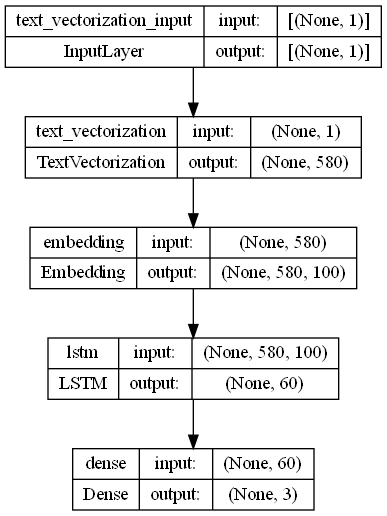

In [86]:
# Plot Layer
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

### 6.1.2 - Model Sequential: Training

In [87]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
history_sequential = model_sequential.fit(data_train, 
                                          epochs= 30, 
                                          validation_data = data_val,
                                          batch_size=20, 
                                          callbacks=[earlystop])

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
19/19 [==============================] - 14s 655ms/step - loss: 1.1007 - accuracy: 0.3585 - val_loss: 1.1057 - val_accuracy: 0.3529
Epoch 2/30
19/19 [==============================] - 12s 660ms/step - loss: 1.0920 - accuracy: 0.3908 - val_loss: 1.1017 - val_accuracy: 0.3529
Epoch 3/30
19/19 [==============================] - 13s 686ms/step - loss: 1.0915 - accuracy: 0.3908 - val_loss: 1.1021 - val_accuracy: 0.3529
Epoch 4/30
19/19 [==============================] - 14s 741ms/step - loss: 1.0903 - accuracy: 0.3908 - val_loss: 1.1016 - val_accuracy: 0.3529
Epoch 5/30
19/19 [==============================] - 13s 723ms/step - loss: 1.0915 - accuracy: 0.3908 - val_loss: 1.1029 - val_accuracy: 0.3529
Epoch 6/30
19/19 [==============================] - 14s 783ms/step - loss: 1.0906 - accuracy: 0.3908 - val_loss: 1.1014 - val_accuracy: 0.3529
Epoch 7/30
19/19 [==============================] - 13s 715ms/step - loss: 1.0925 - accuracy: 0.3908 - val_loss: 1.1031 - val_accuracy: 0.3529

The baseline model has a loss of 1.0901 and an accuracy of 0.3908 on the training data. This means that the model's predictions are not very accurate and the loss (i.e., the error between the predicted and actual values) is quite high.

- On the validation data, the model has a loss of 1.1029 and an accuracy of 0.3529. This suggests that the model is overfitting to the training data, as it is performing worse on the unseen validation data than on the training data.

- The training time of 1863.5616734027863 seconds indicates how long it took the model to train on the data. This time may vary depending on the size of the data and the complexity of the model.

The bias in this context refers to the difference between the predicted values of the model and the true values. In this case, the low accuracy of the model suggests that it has a high bias, meaning that it is not capturing the true patterns in the data and is making poor predictions.

### 6.1.3 - Model Sequential: Evaluation

In [88]:
# Create dataframe
history_seq_baseline = pd.DataFrame(history_sequential.history)

<Axes: >

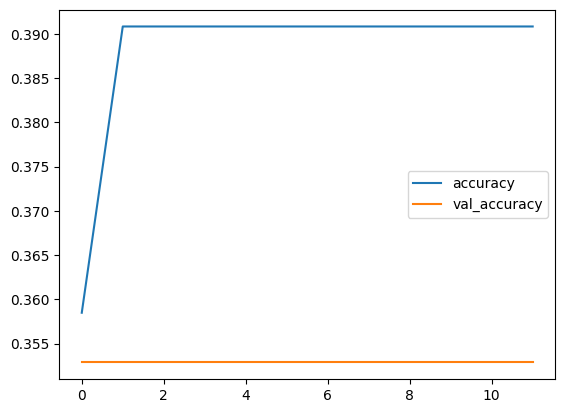

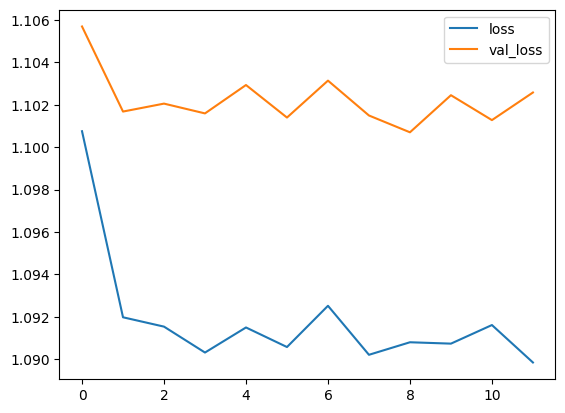

In [89]:
# plot_training_result
history_seq_baseline[['accuracy', 'val_accuracy']].plot()
history_seq_baseline[['loss', 'val_loss']].plot()

In [90]:
# Model Evaluation of train-set
y_pred_seq1 = np.argmax(model_sequential.predict(X_train), axis=1)
print(classification_report(y_train, y_pred_seq1))

12/12 [==============================] - 2s 73ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.39      1.00      0.56       145
           2       0.00      0.00      0.00       121

    accuracy                           0.39       371
   macro avg       0.13      0.33      0.19       371
weighted avg       0.15      0.39      0.22       371



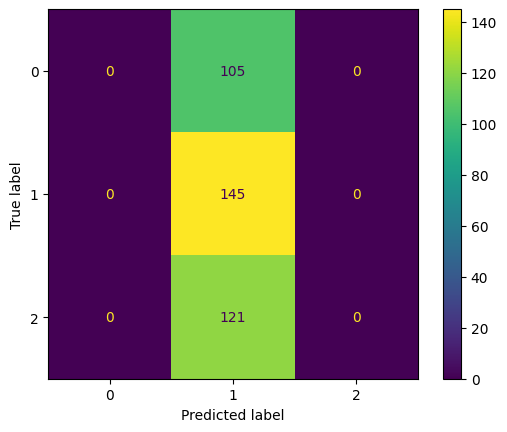

In [91]:
cm_seq1 = confusion_matrix(y_train, y_pred_seq1)
ConfusionMatrixDisplay(cm_seq1,display_labels=[0,1,2]).plot()

In [92]:
# Model Evaluation of test-set
y_pred_seq2 = np.argmax(model_sequential.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_seq2))

5689/5689 [==============================] - 372s 65ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     60725
           1       0.33      1.00      0.50     60592
           2       0.00      0.00      0.00     60719

    accuracy                           0.33    182036
   macro avg       0.11      0.33      0.17    182036
weighted avg       0.11      0.33      0.17    182036



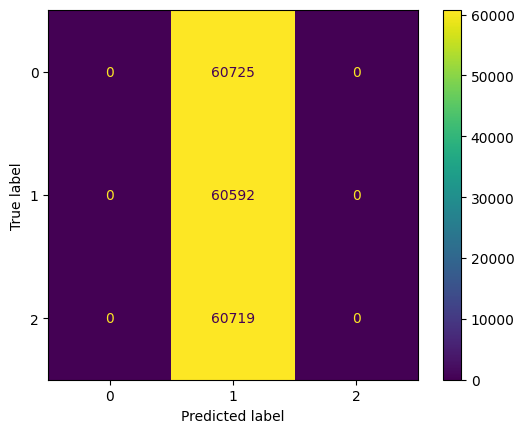

In [93]:
cm_seq2 = confusion_matrix(y_test, y_pred_seq2)
ConfusionMatrixDisplay(cm_seq2,display_labels=[0,1,2]).plot()

From this model we can see that the model may not be properly trained or may not be considering enough information to predict all three classes.

There could be several reasons for this, such as insufficient training data, a high bias or variance in the model, or improper preprocessing of the input data.

## 6.2 - LSTM: Sequential API Improvement

### 6.2.1 - Model Sequential Improvement: Definition

In [138]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Here i'd like to enhance my model with adding hidden layers and some parameters. The text_vectorization layer converts the text data into a numerical form that can be easily processed by the machine learning model. This layer is followed by an embedding layer that takes in the numerical representation of the text data and transforms it into a dense vector representation. This dense vector representation provides additional information about each word in the text data and helps the model to better understand the context of the words.

After the text_vectorization and embedding layers, the model contains three layers of Bidirectional LSTM (Long Short-Term Memory). LSTM is a type of recurrent neural network (RNN) that is designed to handle sequential data, such as text. The Bidirectional LSTM layer takes in the output of the embedding layer and processes it in both directions. This means that the model looks at the past and future contexts of each word in the text data. The output of the Bidirectional LSTM layer is then passed through batch normalization and dropout layers. Batch normalization is used to normalize the input data by adjusting and scaling the activations, which helps in training the model more efficiently. Dropout is used to randomly drop out some of the units in the neural network during training, which helps in preventing overfitting.

The final layer of the model is a dense layer with a softmax activation function. The dense layer takes in the output of the previous layers and produces the final output, which is a probability distribution over the three classes of sentiment: positive, negative, and neutral. The softmax function normalizes the output so that the sum of the probabilities over all classes is equal to one.

The various parameters used in the model_seq_impr are as follows:

- text_vectorization: This layer is used to convert the text data into a numerical form. It takes in the text data and converts it into an array of integers, where each integer represents a word in the text data.

- embedding: This layer is used to transform the numerical representation of the text data into a dense vector representation. It takes in the integer array output of the text_vectorization layer and outputs a tensor of dense vectors.

- Bidirectional LSTM: This layer is a type of RNN that is used to handle sequential data. It takes in the output of the embedding layer and processes it in both directions. The number of neurons in the layer is set to 64, 32, and 16 for the first, second, and third layer, respectively.

- BatchNormalization: This layer is used to normalize the input data by adjusting and scaling the activations.

- Dropout: This layer is used to randomly drop out some of the units in the neural network during training, which helps in preventing overfitting. The dropout rate is set to 0.3.

- Dense: This layer is the final layer of the model and produces the final output, which is a probability distribution over the three classes of sentiment. The activation function used is softmax.

- kernel_regularizer: This parameter is used to apply regularization to the kernel weights in the Bidirectional LSTM layers. L2 regularization is used with a regularization parameter of 0.01.

Overall, the model_seq_impr is a deep learning model that uses various layers such as text_vectorization, embedding, Bidirectional LSTM, batch normalization, dropout, and dense layers to perform sentiment analysis on text data

source: https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

In [139]:
model_seq_impr = Sequential([
    text_vectorization,
    embedding,
    Bidirectional(LSTM(64,  return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(0.01))),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),

    Bidirectional(LSTM(32,  kernel_regularizer=tf.keras.regularizers.L2(0.01), return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),

    Bidirectional(LSTM(16, kernel_regularizer=tf.keras.regularizers.L2(0.01))),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),

    Dense(3, activation='softmax')
])

In [140]:
model_seq_impr.compile(loss='categorical_crossentropy',
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                         metrics=['accuracy'])

In [141]:
model_seq_impr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 576)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 576, 100)          1009100   
                                                                 
 bidirectional (Bidirectiona  (None, 576, 128)         84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 576, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 576, 128)          0         
                                                        

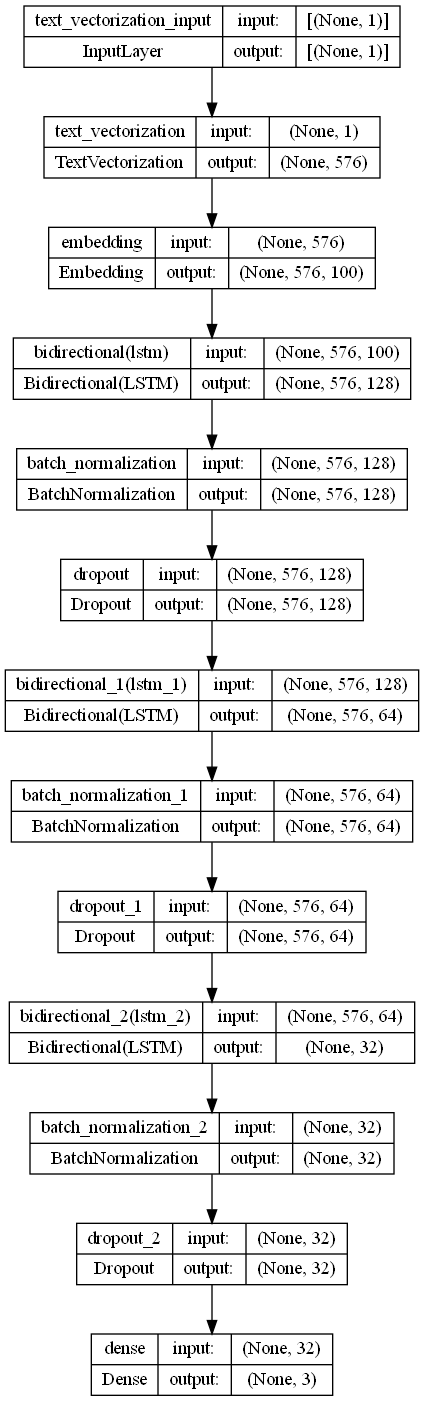

In [142]:
# Plot Layer
tf.keras.utils.plot_model(model_seq_impr, show_shapes=True)

### 6.2.2 - Model Sequential Improvement: Training

In [143]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
history_seq_impr = model_seq_impr.fit(data_train, 
                                          epochs= 30, 
                                          validation_data = data_val,
                                          callbacks=[earlystop])

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
19/19 [==============================] - 82s 4s/step - loss: 7.3919 - accuracy: 0.2884 - val_loss: 5.7484 - val_accuracy: 0.3298
Epoch 2/30
19/19 [==============================] - 69s 4s/step - loss: 5.5858 - accuracy: 0.3639 - val_loss: 4.8696 - val_accuracy: 0.3529
Epoch 3/30
19/19 [==============================] - 66s 4s/step - loss: 4.8727 - accuracy: 0.3504 - val_loss: 4.3816 - val_accuracy: 0.3529
Epoch 4/30
19/19 [==============================] - 61s 3s/step - loss: 4.2959 - accuracy: 0.3854 - val_loss: 4.0153 - val_accuracy: 0.3529
Epoch 5/30
19/19 [==============================] - 73s 4s/step - loss: 3.6104 - accuracy: 0.5822 - val_loss: 3.7129 - val_accuracy: 0.3529
Epoch 6/30
19/19 [==============================] - 71s 4s/step - loss: 3.0097 - accuracy: 0.7844 - val_loss: 3.3883 - val_accuracy: 0.3636
Epoch 7/30
19/19 [==============================] - 62s 3s/step - loss: 2.4376 - accuracy: 0.9245 - val_loss: 3.1263 - val_accuracy: 0.3547
Epoch 8/30
19/19 [==

The trained model is a neural network that was trained for 30 epochs, which means the model was iteratively trained on the dataset 30 times. However, the training process stopped at epoch 20 because the model had achieved satisfactory accuracy and loss values. At epoch 20, the model had a loss of 0.5256 and an accuracy of 0.9865, which indicates that the model was accurately predicting the sentiment of the reviews in the dataset.

During the training process, the model was also evaluated on a validation dataset to check for overfitting, which occurs when the model performs well on the training dataset but poorly on unseen data. At epoch 20, the validation loss was 2.3131, and the validation accuracy was 0.3789, which is significantly lower than the training accuracy. This suggests that the model may have overfitted to the training dataset, which is a common problem in neural network models.

The training process took approximately 57 minutes. During the training process, the model was optimized using the Adam optimizer, which is a popular optimization algorithm for training neural networks. The loss function used was categorical cross-entropy, which is a common loss function for multi-class classification problems like sentiment analysis.

### 6.2.2 - Model Sequential Improvement: Evaluation

In [144]:
# Create dataframe
history_seq_impr = pd.DataFrame(history_seq_impr.history)

<Axes: >

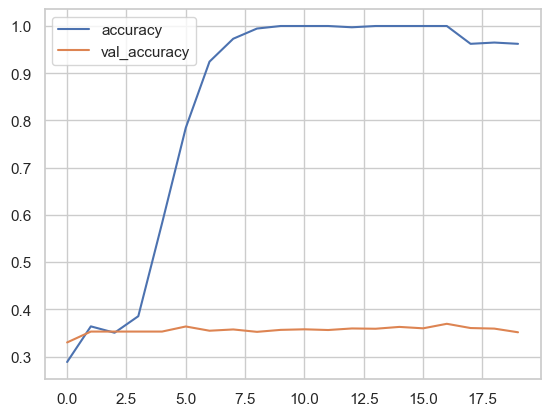

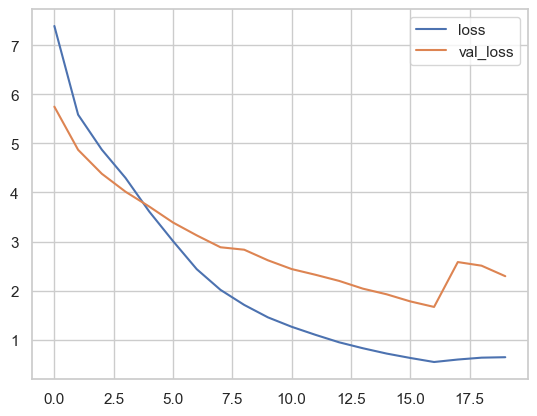

In [145]:
# plot_training_result
history_seq_impr[['accuracy', 'val_accuracy']].plot()
history_seq_impr[['loss', 'val_loss']].plot()

In [146]:
# Model Evaluation of train-set

y_pred_seq_impr1 = np.argmax(model_seq_impr.predict(X_train), axis=1)
print(classification_report(y_train, y_pred_seq_impr1))

12/12 [==============================] - 6s 268ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       105
           1       1.00      0.94      0.97       145
           2       0.94      0.96      0.95       121

    accuracy                           0.96       371
   macro avg       0.96      0.96      0.96       371
weighted avg       0.96      0.96      0.96       371



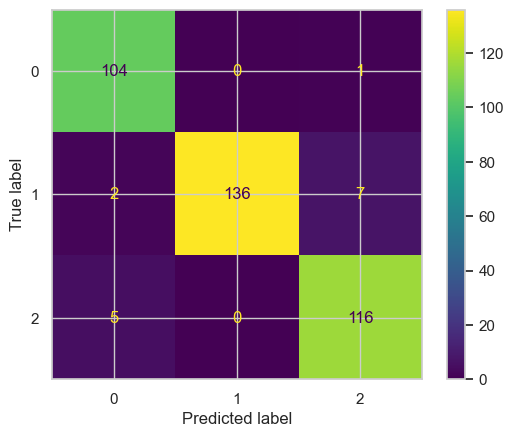

In [147]:
cm_seq_impr1 = confusion_matrix(y_train, y_pred_seq_impr1)
ConfusionMatrixDisplay(cm_seq_impr1,display_labels=[0,1,2]).plot()

In [148]:
# Model Evaluation of test-set

y_pred_seq_impr2 = np.argmax(model_seq_impr.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_seq_impr2))

5689/5689 [==============================] - 1870s 329ms/step
              precision    recall  f1-score   support

           0       0.37      0.51      0.43     60725
           1       0.35      0.13      0.19     60592
           2       0.36      0.45      0.40     60719

    accuracy                           0.36    182036
   macro avg       0.36      0.36      0.34    182036
weighted avg       0.36      0.36      0.34    182036



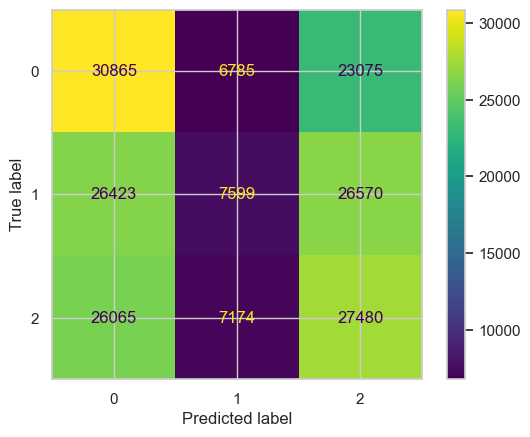

In [149]:
cm_seq_impr2 = confusion_matrix(y_test, y_pred_seq_impr2)
ConfusionMatrixDisplay(cm_seq_impr2,display_labels=[0,1,2]).plot()

From the confusion matrix, we can see that the model has a high bias towards predicting sentiment 0 (negative). For example, when the true sentiment is 0 (negative), the model has predicted 26423 instances as sentiment 1 (neutral) and 26065 instances as sentiment 2 (positive), while 30865 instances were correctly predicted as negative sentiment.

In summary, the confusion matrix shows that the model has a significant bias towards predicting negative and positive sentiment across all classes. The model is under-predicting neutral sentiment and over-predicting negative and positive sentiment. This could be due to various factors such as class imbalance, poor feature selection, or a suboptimal model architecture. To improve the model's performance, the bias towards negative and positive sentiment needs to be addressed, for example, by adjusting the model's weights or re-sampling the data to balance the classes.

# 7 - Model Analysis

In [154]:
model_analysis = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq_impr2)
})
df_analysis = pd.concat([pd.DataFrame(X_test), model_analysis],axis=1)
df_analysis 

,review_detail,actual,prediction
178261,a spoilers sureim sure two leads reconcilliati...,1,0
79343,this wonderful idea behind moment starting dec...,0,0
57136,dark bleak brooding young adam charged unexplo...,2,0
138158,hoosiers good example moves fast gene hackman ...,1,0
121953,even expected weak mindless drenched cliches y...,0,0
...,...,...,...
66852,it hard believe someone directed wrote purple ...,0,2
5842,yet another reason disregard reviews paid news...,2,1
105426,this terrible grease one top 3 favorite movies...,0,2
16211,an excellent starring michael caine portrays b...,2,2


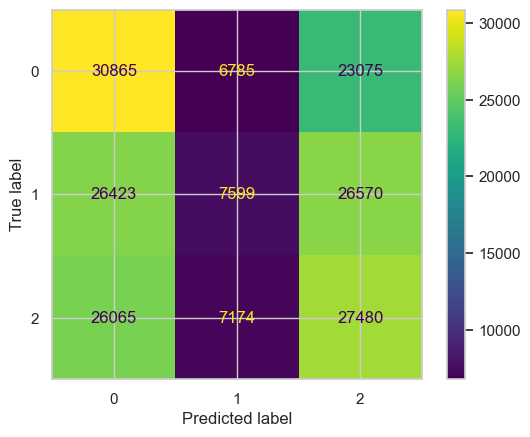

In [155]:
# Confusion Matrix
cm_test_analysis = confusion_matrix(y_test, y_pred_seq_impr2)
ConfusionMatrixDisplay(cm_test_analysis).plot()

### 7.1 - Top words for false positive and false negative

In [156]:
# define df for both false positive and false negative
df_analysis_fp = df_analysis[(df_analysis['actual'] != 0 & (df_analysis['prediction'] == 0))]
df_analysis_fn = df_analysis[(df_analysis['actual'] == 0 & (df_analysis['prediction'] != 0))]

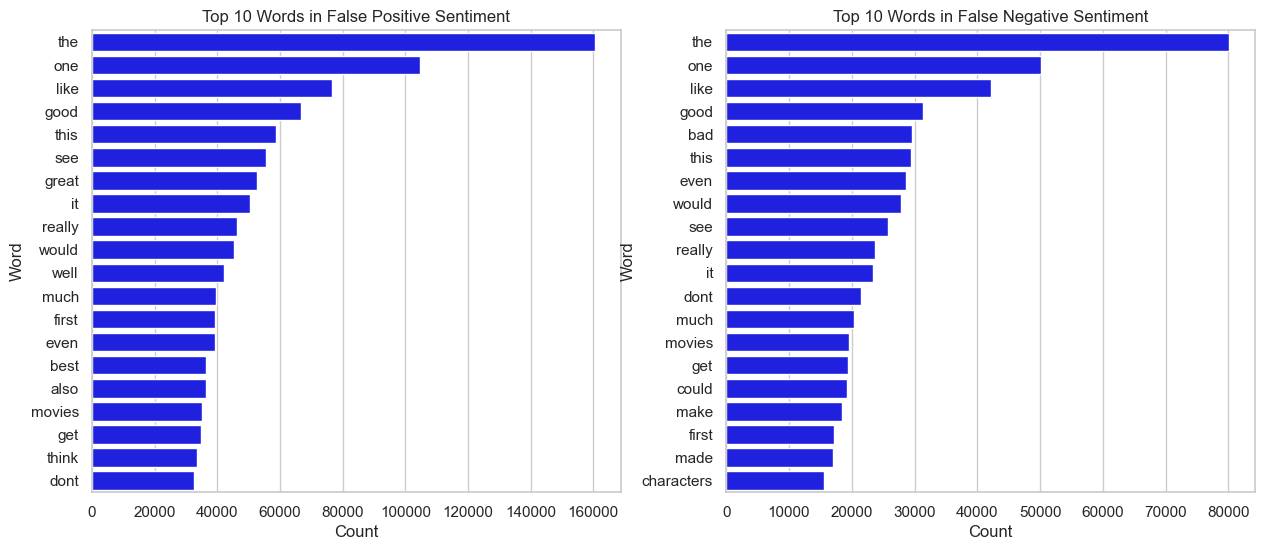

In [157]:
# visuzalize
fig, ax =plt.subplots(1,2,figsize=(15,6))

# Top 10 words on false positive sentiment
tk_fp = Tokenizer(num_words=100000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=' ')
tk_fp.fit_on_texts(df_analysis_fp['review_detail'])

# create a Pandas DataFrame from the top 10 words and their counts
top_words_fp = dict(collections.Counter(tk_fp.word_counts).most_common(20))
df_top_words_fp = pd.DataFrame(list(top_words_fp.items()), columns=['Word', 'Count'])

# create a horizontal barplot using Seaborn
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Word', data=df_top_words_fp, color='blue', ax=ax[0])

# top 10 words on false negative sentiment
tk_fn = Tokenizer(num_words=100000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=' ')
tk_fn.fit_on_texts(df_analysis_fn['review_detail'])

# create a Pandas DataFrame from the top 10 words and their counts
top_words_fn = dict(collections.Counter(tk_fn.word_counts).most_common(20))
df_top_words_fn = pd.DataFrame(list(top_words_fn.items()), columns=['Word', 'Count'])

# create a horizontal barplot using Seaborn
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Word', data=df_top_words_fn, color='blue', ax=ax[1])

ax[0].set_title('Top 10 Words in False Positive Sentiment')
ax[1].set_title('Top 10 Words in False Negative Sentiment')
plt.show()

Based on the information above, it can be concluded that:

- The model is likely to make false positive predictions if the review contains common words such as "one", "good", "see", "great", and "really". These words are commonly used in other categories of reviews, which may cause the model to misclassify the review.
- The model is likely to make false negative predictions if the review contains common words such as "one", "good", "bad", "even", and "see". These words are also commonly used in other categories of reviews, which may cause the model to misclassify the review.

# 8 - Model Saving

In [110]:
# Summary of model sequential
model_seq_impr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 580)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 580, 100)          1009000   
                                                                 
 bidirectional (Bidirectiona  (None, 580, 128)         84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 580, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 580, 128)          0         
                                                        

In [111]:
# Freeze Model
model_seq_impr.trainable = False
model_seq_impr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 580)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 580, 100)          1009000   
                                                                 
 bidirectional (Bidirectiona  (None, 580, 128)         84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 580, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 580, 128)          0         
                                                        

In [112]:
# saving model
model_seq_impr.save('imdb_sentiment', save_traces=True)

INFO:tensorflow:Assets written to: imdb_sentiment\assets


INFO:tensorflow:Assets written to: imdb_sentiment\assets


# 9 - Conclusion

### Metrics Model

- The improved LSTM models showed the best metrics.
I chose to use the LSTM base model with the Sequential API because I found it more practical for this dataset, which only requires one input.
- The metrics showed that the model's accuracy for the train data was 100%, while it was only 32% for the test data. This indicates that the model is severely overfitting. I assume that there is subjectivity in the sentiment classification process when building the dataset. This has been proven in the EDA section, where there were reviews that were very similar between sentiment classes. Additionally, this is due to the lack of exploration in model improvement due to time constraints.
- Model improvement can significantly improve the quality of the metrics. Some of the model improvement techniques that were tried include adding and removing hidden layers, adding batch normalization, applying dropout, and experimenting with activation functions such as leaky ReLU and ELU.

### Analysis of the strengths and weaknesses of each model

- Sentiment analysis using the RNN model with the Sequential API architecture is practical for making model improvisations. However, finding the right improvisations can be challenging and requires further exploration and research into the model.
- The model is likely to make false positive predictions if the review contains common words such as "one," "good," "see," "great," and "really." These words are commonly used in other categories of reviews, which may cause the model to misclassify the review.
The model is likely to make false negative predictions if the review contains common words such as "one," "good," "bad," "even," and "see." These words are also commonly used in other categories of reviews, which may cause the model to misclassify the review.
- This combination of words that ahs different conotation in most of cases impacted to the bias prediction of the model

### Improvement Suggestions

- Improvements that can be applied to this RNN model include exploring more model improvement components to create an even better model.
- Improvement can also be made to the case folding process by further studying the text data cleaning process.
- Try with GRU or Simple RNN
- Try to use transfer learning BERT as some practice have proved BERT model performed well in handling sentiment analysis (https://medium.com/analytics-vidhya/introduction-to-bert-and-its-application-in-sentiment-analysis-9c593e955560)

### Insights after the EDA and next steps

- Undersampling was used to address the imbalanced data since reviews in each sentiment class were almost identical. This also helped prevent overfitting.
- Based on the analysis of the top 10 words that frequently appear in the EDA, the most commonly used words were "one," "good," "see," "make," and "really."
- The process I want to highlight is case folding in the preprocessing stage. This process is closely related to EDA. More thorough case folding involves deep EDA, which carefully examines every character in a tweet to identify things that need to be removed, such as prefixes, hashtags, mentions, etc. The case folding that has been performed includes converting to lowercase, removing mentions, removing hashtags, removing links, removing non-alphabetic characters, removing "@," removing stopwords, stemming, and lemmatizing.
